In [26]:

#base kmean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Load the dataset
#data = pd.read_csv("household_power_consumption.csv")

data = pd.read_csv("Crop_Recommendation.csv")
attributes = ['Nitroge','Phosphorus','Potassium','Temperature','Humidity','pH_Value','Rainfall']

# Select the attributes for clustering
#attributes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
#              'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Loop through each pair of attributes
for i in range(len(attributes)):
    for j in range(i+1, len(attributes)):
        X = data[[attributes[i], attributes[j]]]

        # Elbow method to find the optimal number of clusters
        inertia = []
        for n_clusters in range(1, 11):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans.fit(X)
            inertia.append(kmeans.inertia_)

        # Perform K-means clustering with the optimal number of clusters
        optimal_n_clusters = 3  # Choose the number of clusters from the elbow method
        kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
        kmeans.fit(X)

        # Get cluster centers
        cluster_centers = kmeans.cluster_centers_

        # Assign clusters to the data points
        data['Cluster'] = kmeans.labels_

        # Plot the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(data[attributes[i]], data[attributes[j]], c=data['Cluster'], cmap='viridis', s=50, alpha=0.5)
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=200, label='Centroids')
        plt.title('K-means Clustering: {} vs {}'.format(attributes[i], attributes[j]))
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.legend()
        plt.grid(True)
        plt.show()


KeyError: "['Nitroge'] not in index"

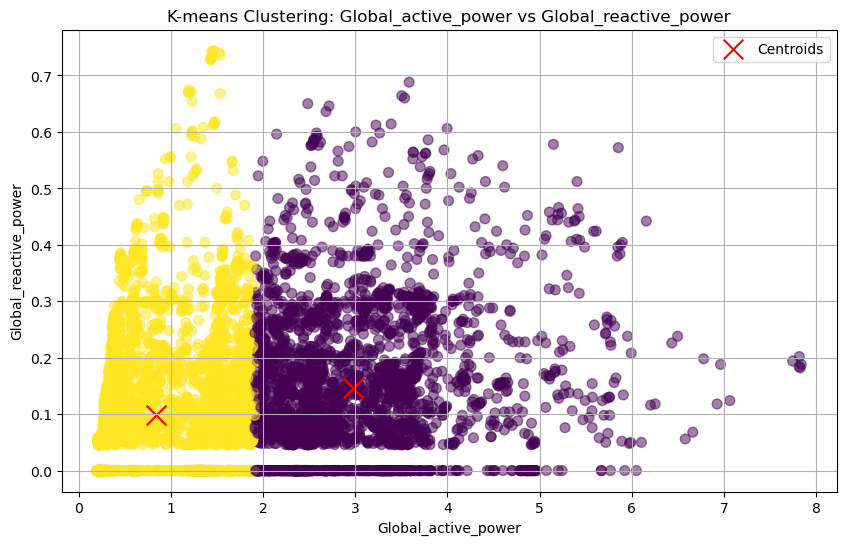

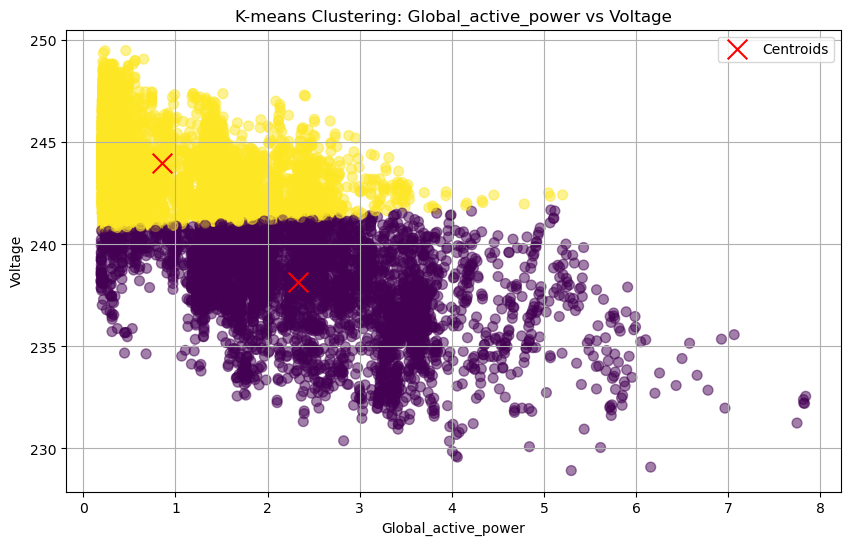

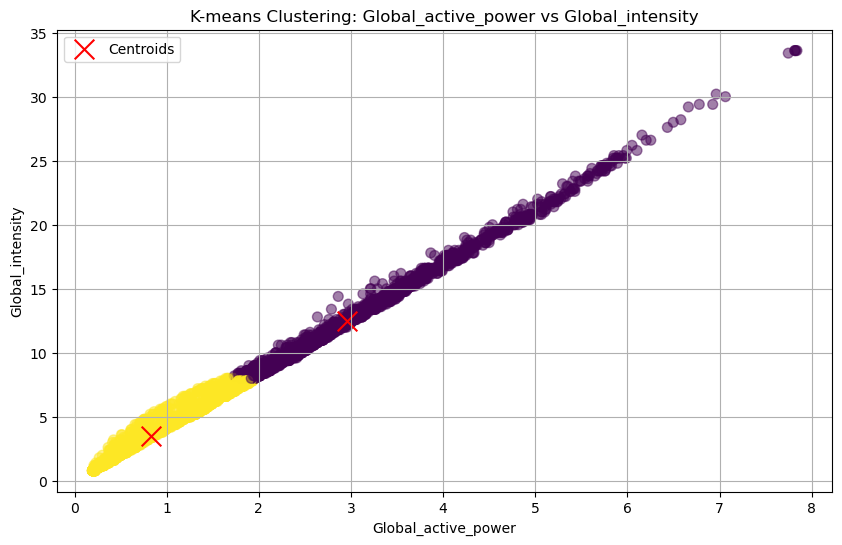

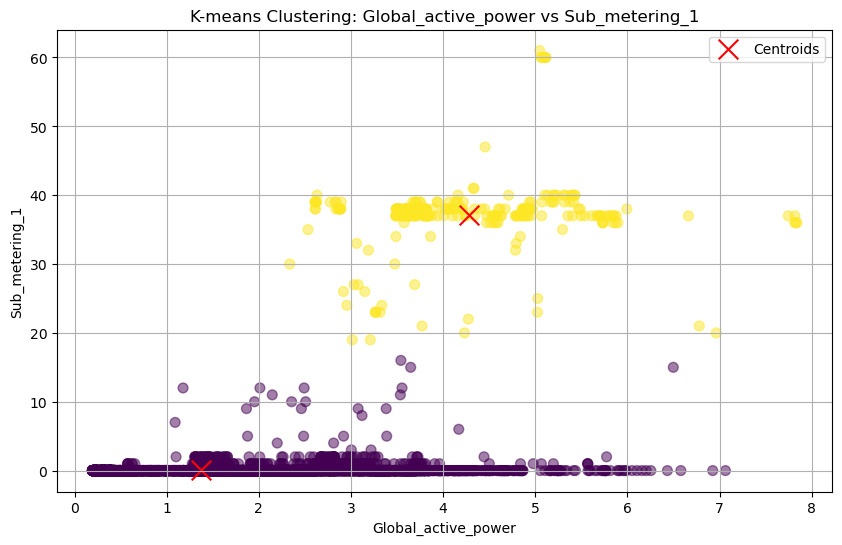

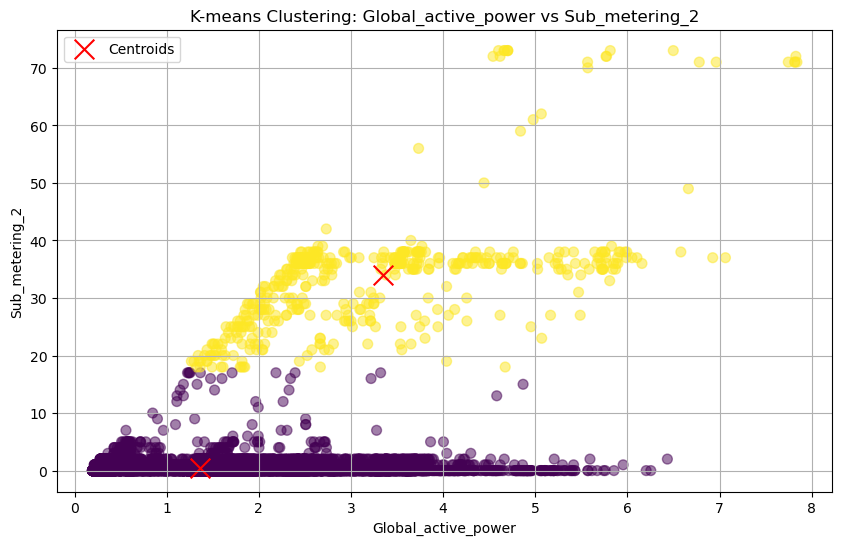

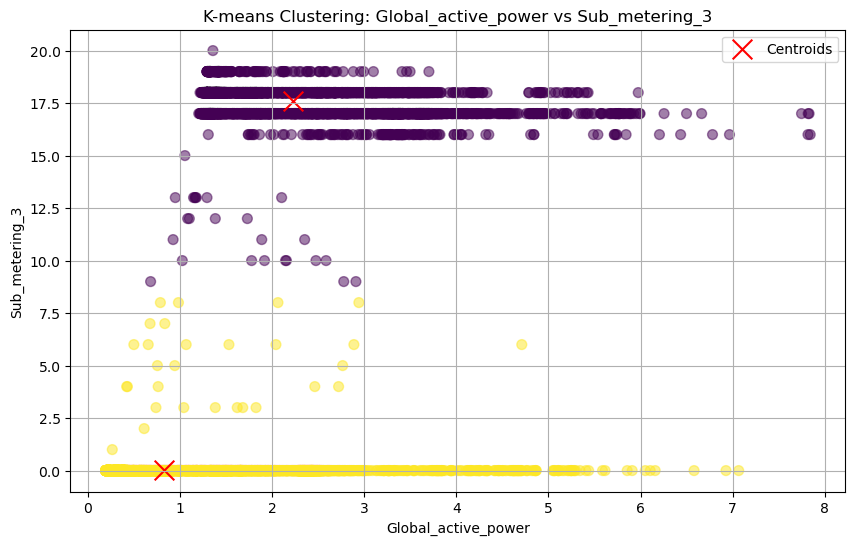

KeyboardInterrupt: 

In [54]:
#kmean with obtimal cluster amount
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("household_power_consumption.csv")

# Select the attributes for clustering
attributes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
              'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Loop through each pair of attributes
for i in range(len(attributes)):
    for j in range(i+1, len(attributes)):
        X = data[[attributes[i], attributes[j]]]

        # Elbow method to find the optimal number of clusters
        inertia = []
        for n_clusters in range(1, 11):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans.fit(X)
            inertia.append(kmeans.inertia_)

        # Calculate rate of change of inertia
        rate_of_change = [inertia[i] - inertia[i+1] for i in range(len(inertia)-1)]

        # Find the "elbow" point
        elbow_point = np.argmax(rate_of_change)

        # Perform K-means clustering with the optimal number of clusters
        optimal_n_clusters = elbow_point + 2  # Add 2 to account for 0-based indexing and +1 for the first value
        kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
        kmeans.fit(X)

        # Get cluster centers
        cluster_centers = kmeans.cluster_centers_

        # Assign clusters to the data points
        data['Cluster'] = kmeans.labels_

        # Plot the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(data[attributes[i]], data[attributes[j]], c=data['Cluster'], cmap='viridis', s=50, alpha=0.5)
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=200, label='Centroids')
        plt.title('K-means Clustering: {} vs {}'.format(attributes[i], attributes[j]))
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.legend()
        plt.grid(True)
        plt.show()


In [1]:

#best
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def assign_clusters(X, centroids):
    clusters = np.zeros(len(X))
    for i in range(len(X)):
        distances = [calculate_distance(X[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def update_centroids(X, clusters, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def kmeans(X, n_clusters, max_iterations=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iterations):
        # Assign clusters
        clusters = assign_clusters(X, centroids)
        
        # Update centroids
        new_centroids = update_centroids(X, clusters, n_clusters)

        # Check convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Load the dataset
data = pd.read_csv("household_power_consumption.csv")

data = data.head(1000)

# Select the attributes for clustering
attributes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
              'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


# Loop through each pair of attributes
for i in range(len(attributes)):
    for j in range(i+1, len(attributes)):
        X = data[[attributes[i], attributes[j]]].values

        # Elbow method to find the optimal number of clusters
        inertia = []
        for n_clusters in range(1, 11):
            clusters, centroids = kmeans(X, n_clusters)
            inertia.append(np.sum((X - centroids[clusters.astype(int)]) ** 2))

        # Calculate rate of change of inertia
        rate_of_change = [inertia[i] - inertia[i+1] for i in range(len(inertia)-1)]

        # Find the "elbow" point
        elbow_point = np.argmax(rate_of_change)

        # Perform K-means clustering with the optimal number of clusters
        optimal_n_clusters = elbow_point + 2  # Add 2 to account for 0-based indexing and +1 for the first value
        clusters, centroids = kmeans(X, optimal_n_clusters)

        # Plot the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
        plt.title('K-means Clustering: {} vs {}'.format(attributes[i], attributes[j]))
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.legend()
        plt.grid(True)
        plt.show()


KeyError: 'labels'

Average accuracy for K-means clustering: 38.09%
Inertia for 1 clusters: 517.98126726
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 112.35768165556284
Accuracy for 2 clusters: 56.20%
Inertia for 3 clusters: 101.87349202725203
Accuracy for 3 clusters: 42.38%
Inertia for 4 clusters: 26.95129766626628
Accuracy for 4 clusters: 37.98%
Inertia for 5 clusters: 19.917495591431724
Accuracy for 5 clusters: 36.63%


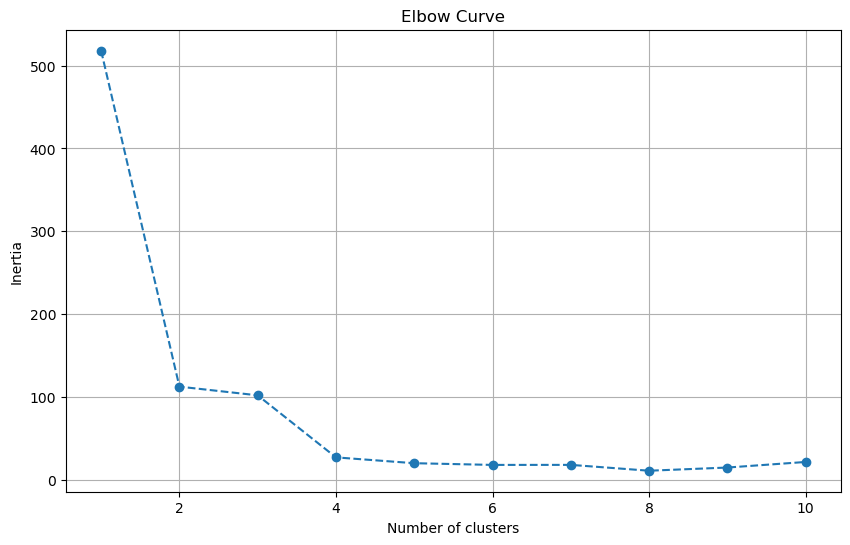

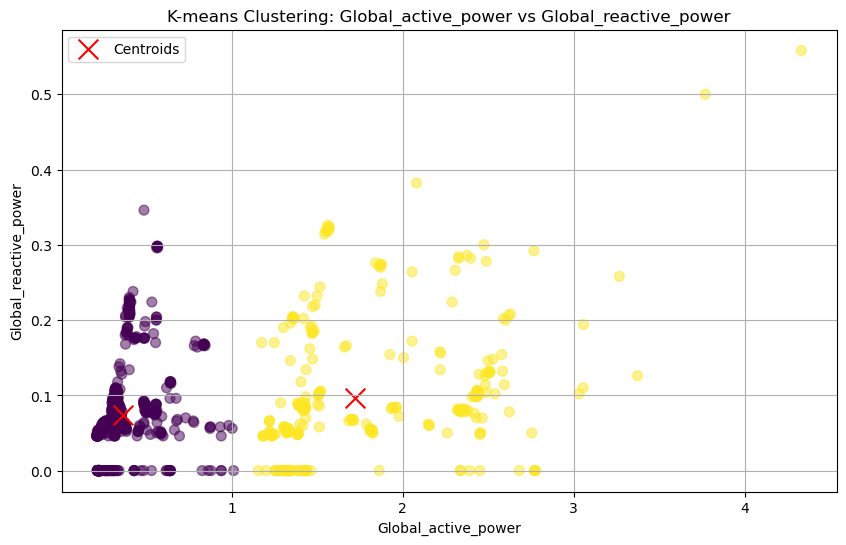

Average accuracy for K-means clustering: 31.00%
Inertia for 1 clusters: 8103.346361496
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 2735.0991902760443
Accuracy for 2 clusters: 54.99%
Inertia for 3 clusters: 1121.738567212889
Accuracy for 3 clusters: 35.42%
Inertia for 4 clusters: 774.088533249099
Accuracy for 4 clusters: 25.47%
Inertia for 5 clusters: 608.0967055202946
Accuracy for 5 clusters: 20.85%


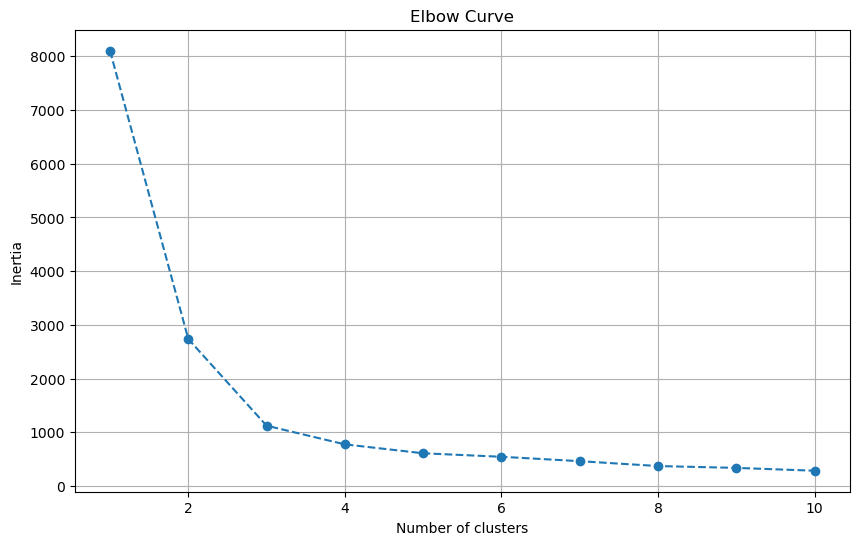

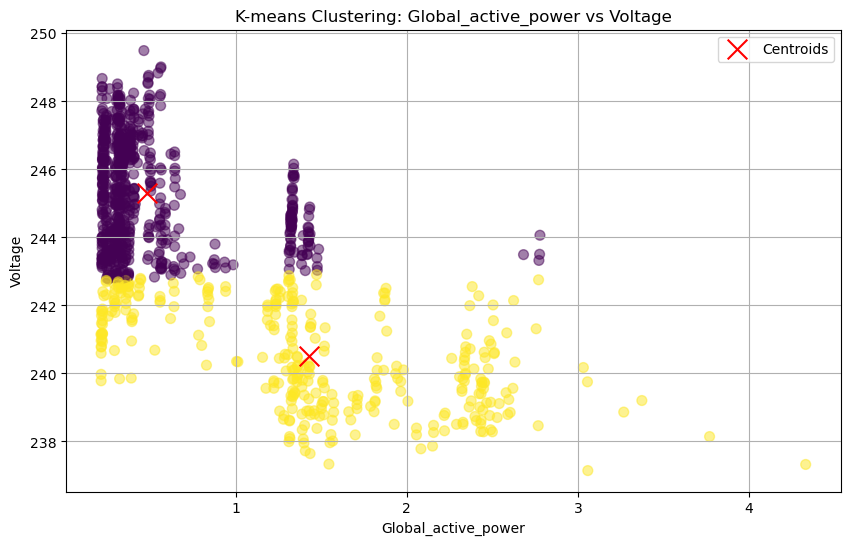

Average accuracy for K-means clustering: 36.35%
Inertia for 1 clusters: 9395.995745596
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 2043.602233131346
Accuracy for 2 clusters: 56.20%
Inertia for 3 clusters: 614.5283007716055
Accuracy for 3 clusters: 51.26%
Inertia for 4 clusters: 452.81680942034365
Accuracy for 4 clusters: 40.54%
Inertia for 5 clusters: 422.35095346949976
Accuracy for 5 clusters: 25.09%


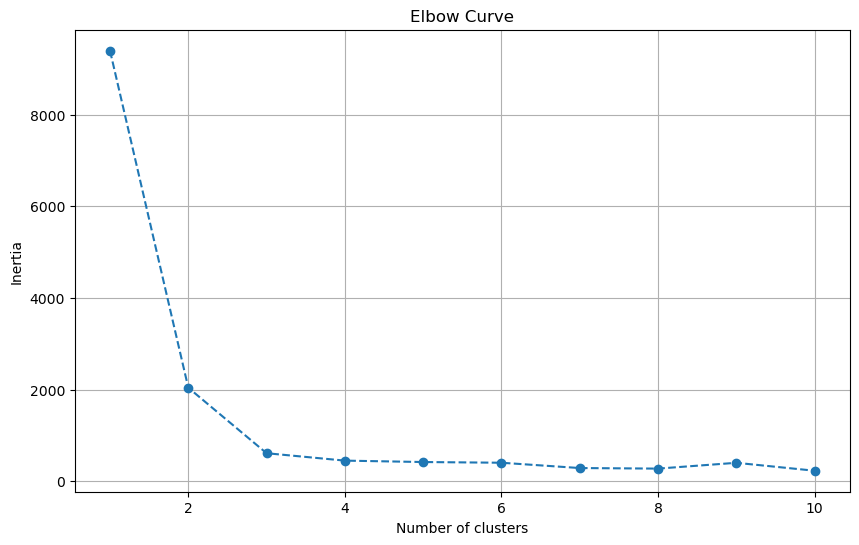

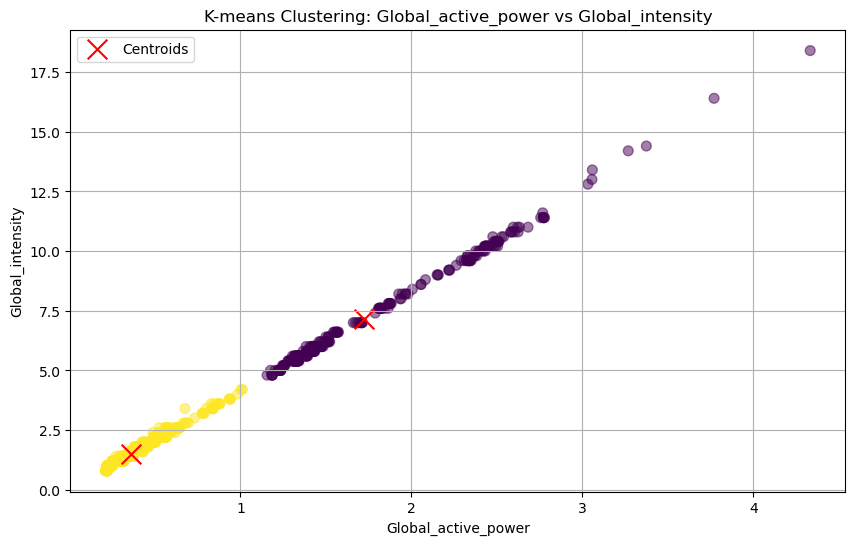

Average accuracy for K-means clustering: 34.87%
Inertia for 1 clusters: 513.019785596
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 107.5092248765432
Accuracy for 2 clusters: 56.20%
Inertia for 3 clusters: 97.1083165349728
Accuracy for 3 clusters: 42.21%
Inertia for 4 clusters: 22.31660839472314
Accuracy for 4 clusters: 37.90%
Inertia for 5 clusters: 20.823786131189834
Accuracy for 5 clusters: 24.02%


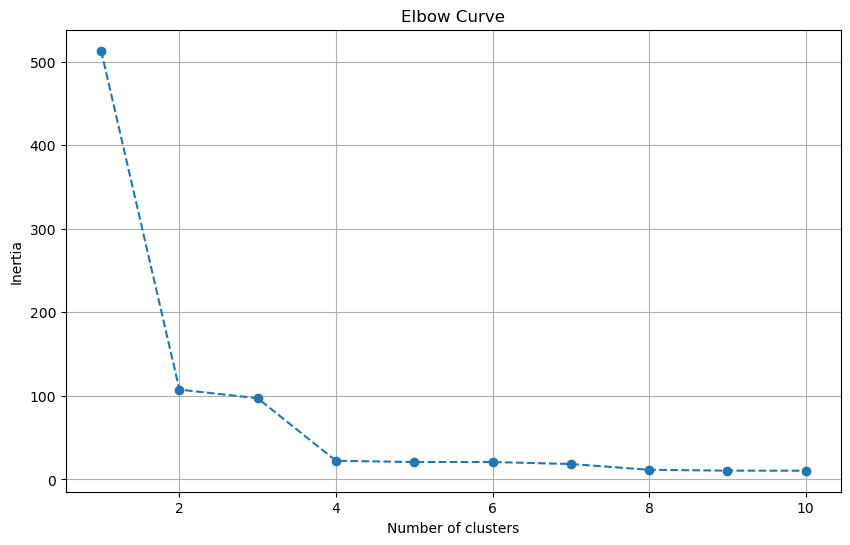

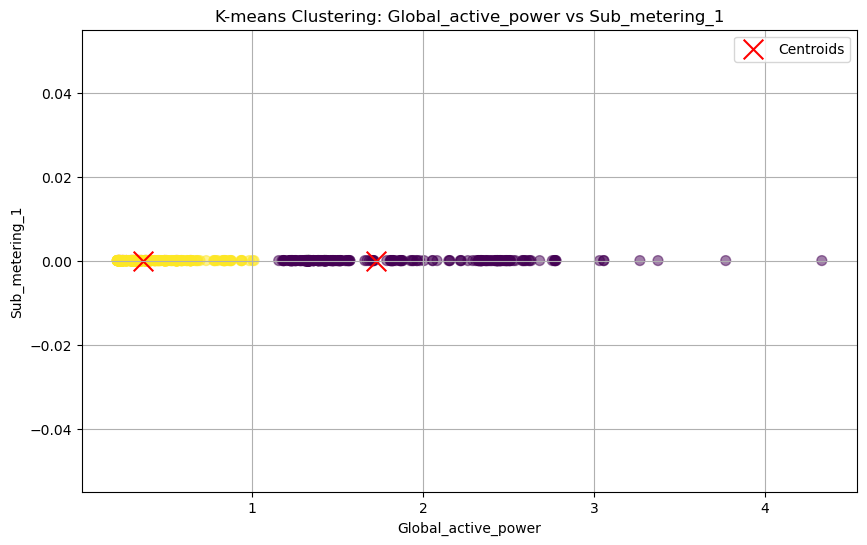

Average accuracy for K-means clustering: 41.21%
Inertia for 1 clusters: 742.7957855959999
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 540.2660174971957
Accuracy for 2 clusters: 78.43%
Inertia for 3 clusters: 158.42906700870512
Accuracy for 3 clusters: 44.38%
Inertia for 4 clusters: 86.55405805334317
Accuracy for 4 clusters: 40.25%
Inertia for 5 clusters: 63.5829284178298
Accuracy for 5 clusters: 38.99%


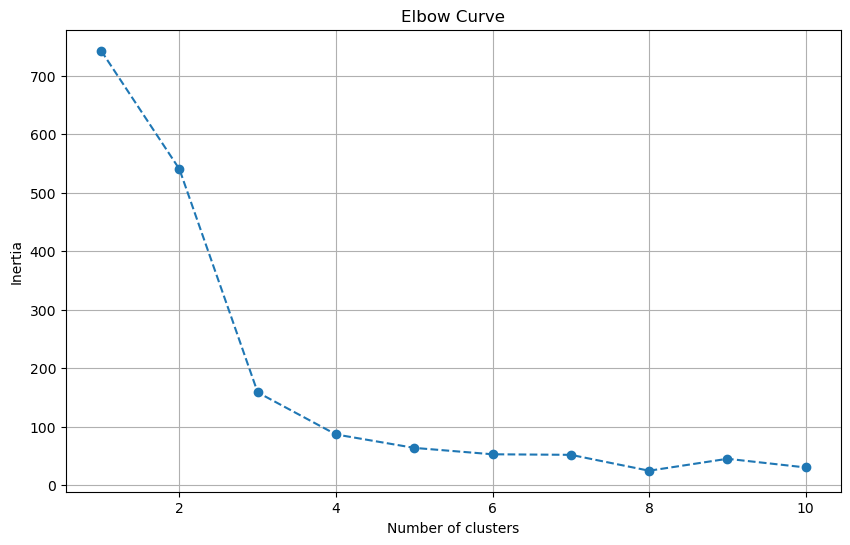

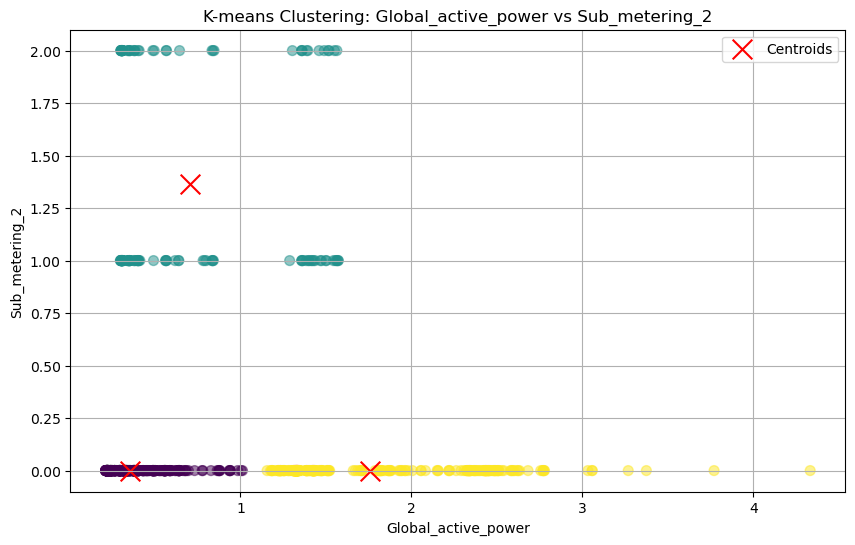

Average accuracy for K-means clustering: 41.89%
Inertia for 1 clusters: 41328.458785596
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 464.48269771995945
Accuracy for 2 clusters: 74.78%
Inertia for 3 clusters: 263.96325526889746
Accuracy for 3 clusters: 50.59%
Inertia for 4 clusters: 254.0006725544275
Accuracy for 4 clusters: 36.97%
Inertia for 5 clusters: 147.64151873973856
Accuracy for 5 clusters: 50.49%


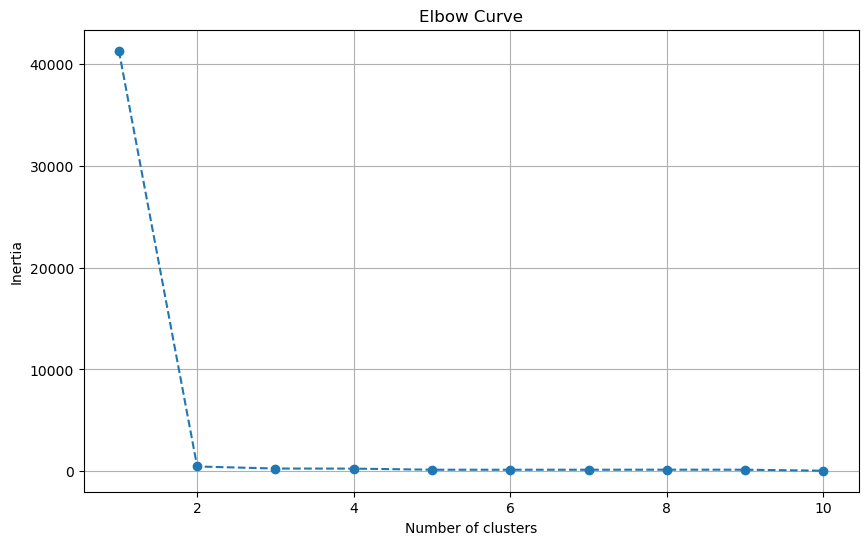

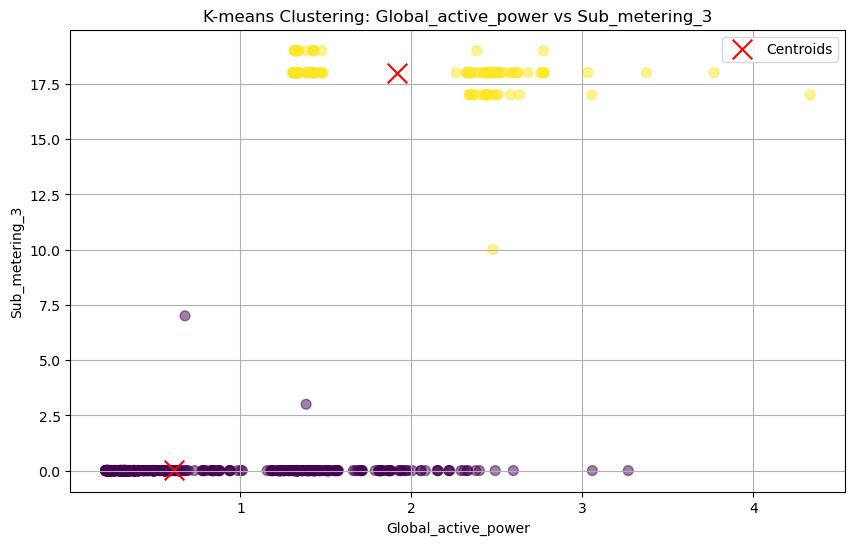

Average accuracy for K-means clustering: 30.58%
Inertia for 1 clusters: 7595.288057563999
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 2401.019049466204
Accuracy for 2 clusters: 52.60%
Inertia for 3 clusters: 874.9862471974195
Accuracy for 3 clusters: 35.34%
Inertia for 4 clusters: 540.9782076512622
Accuracy for 4 clusters: 25.28%
Inertia for 5 clusters: 400.0578907709521
Accuracy for 5 clusters: 22.12%


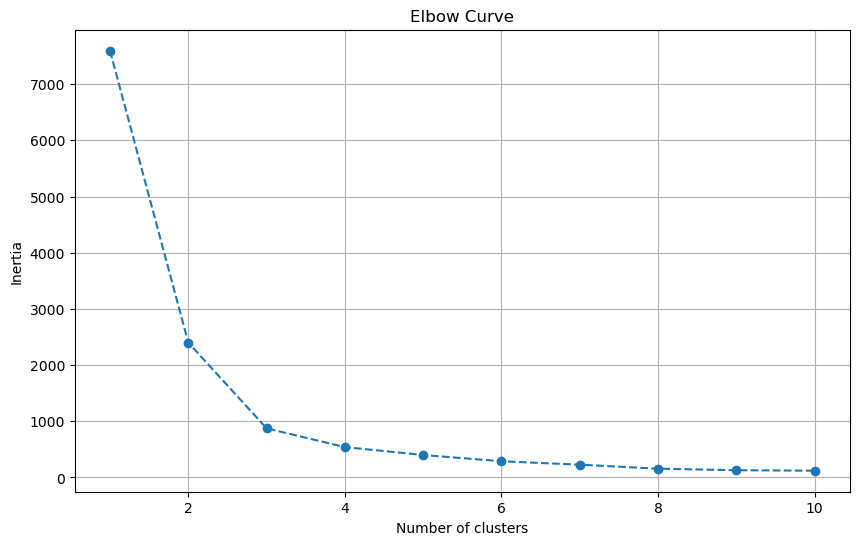

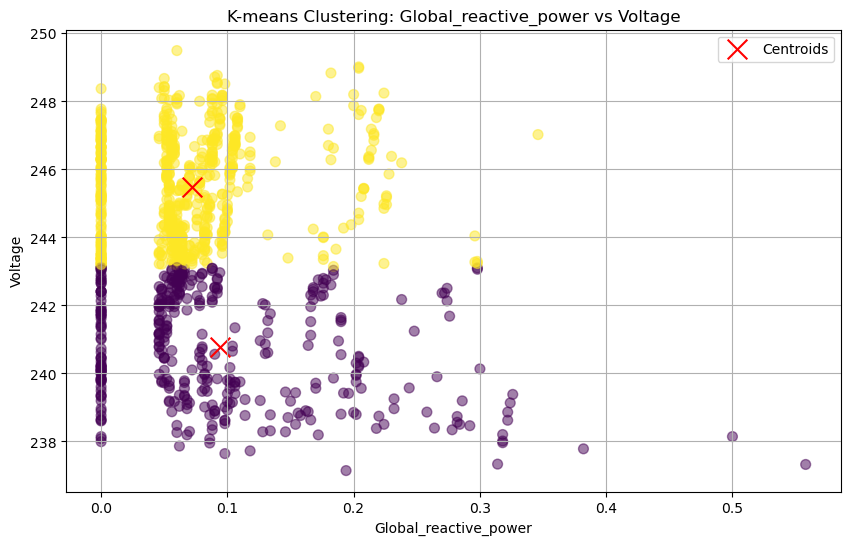

Average accuracy for K-means clustering: 36.58%
Inertia for 1 clusters: 8887.937441663998
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 1940.9414650338226
Accuracy for 2 clusters: 56.20%
Inertia for 3 clusters: 1771.3988246830054
Accuracy for 3 clusters: 38.66%
Inertia for 4 clusters: 454.9027702298415
Accuracy for 4 clusters: 49.05%
Inertia for 5 clusters: 312.0000734086459
Accuracy for 5 clusters: 32.84%


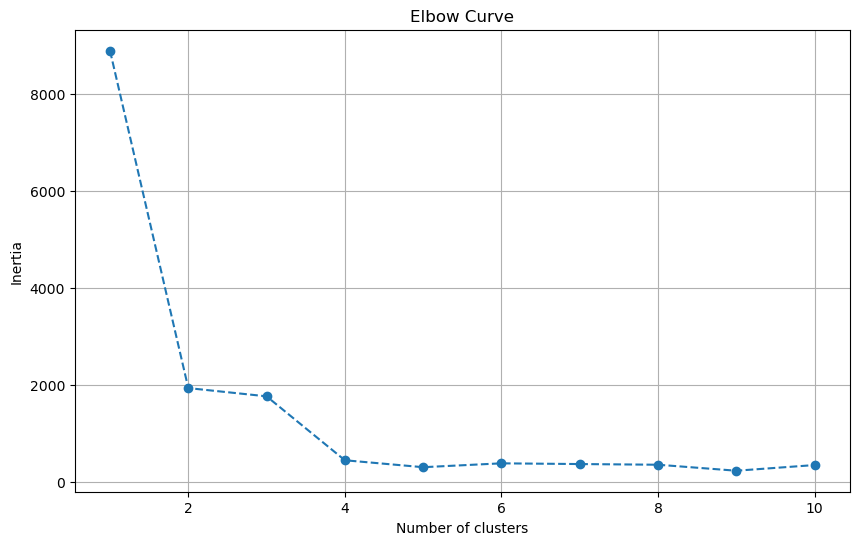

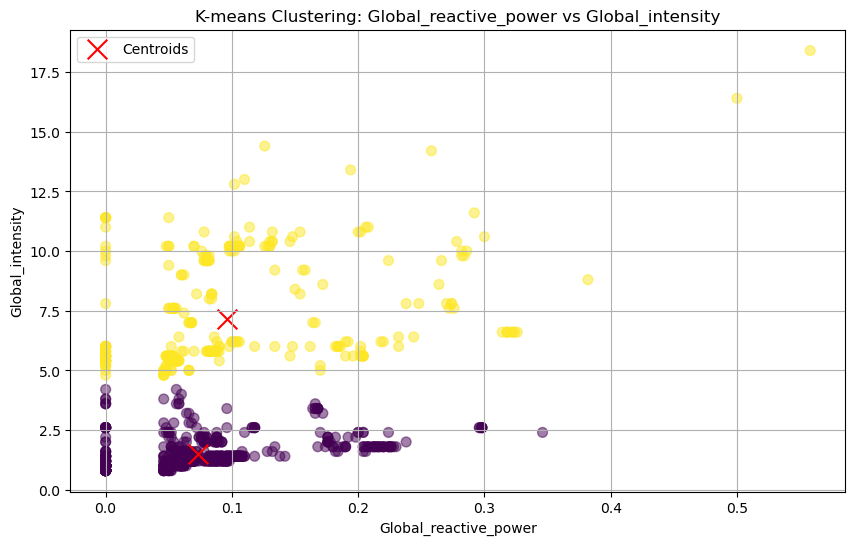

Average accuracy for K-means clustering: 39.21%
Inertia for 1 clusters: 4.961481663999999
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 1.6284069206953433
Accuracy for 2 clusters: 74.78%
Inertia for 3 clusters: 0.8409213295795797
Accuracy for 3 clusters: 50.04%
Inertia for 4 clusters: 0.4789394716921361
Accuracy for 4 clusters: 47.79%
Inertia for 5 clusters: 0.2610517075036789
Accuracy for 5 clusters: 27.81%


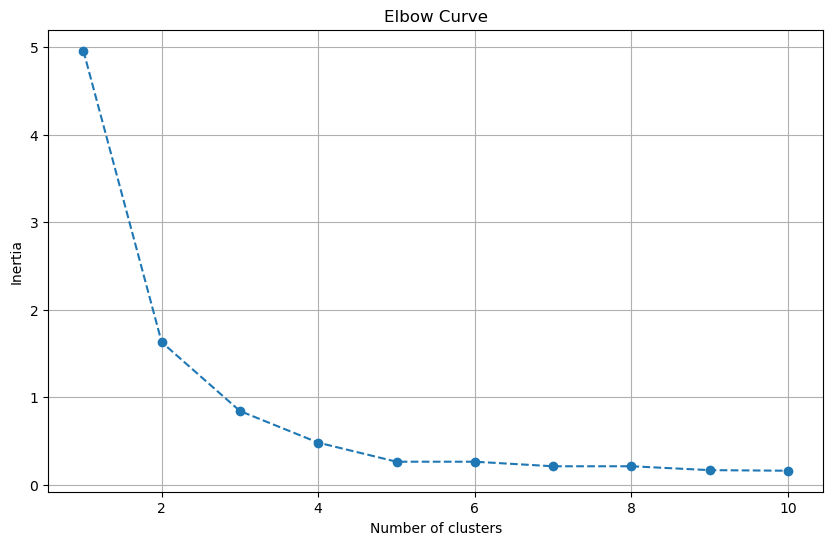

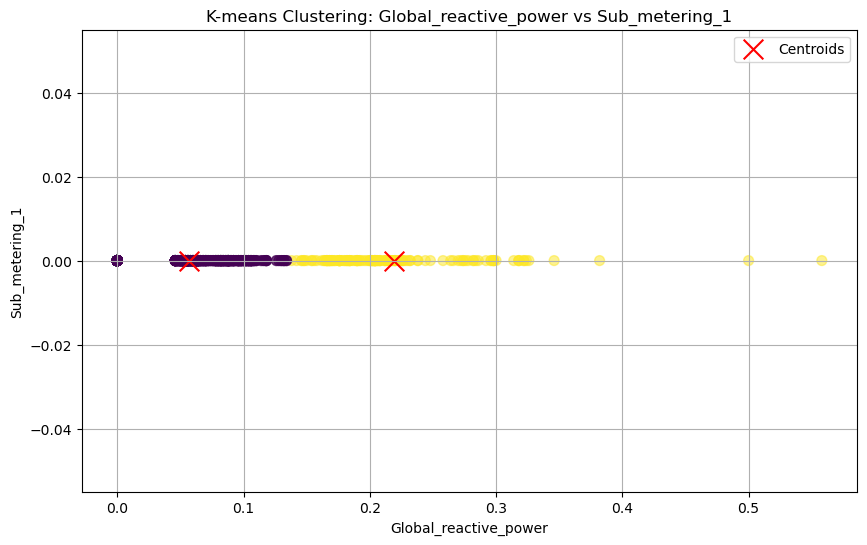

Average accuracy for K-means clustering: 49.01%
Inertia for 1 clusters: 234.73748166399997
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 32.88874192982359
Accuracy for 2 clusters: 78.43%
Inertia for 3 clusters: 30.814519267392637
Accuracy for 3 clusters: 63.29%
Inertia for 4 clusters: 30.081550390721883
Accuracy for 4 clusters: 41.90%
Inertia for 5 clusters: 31.6848918960385
Accuracy for 5 clusters: 52.72%


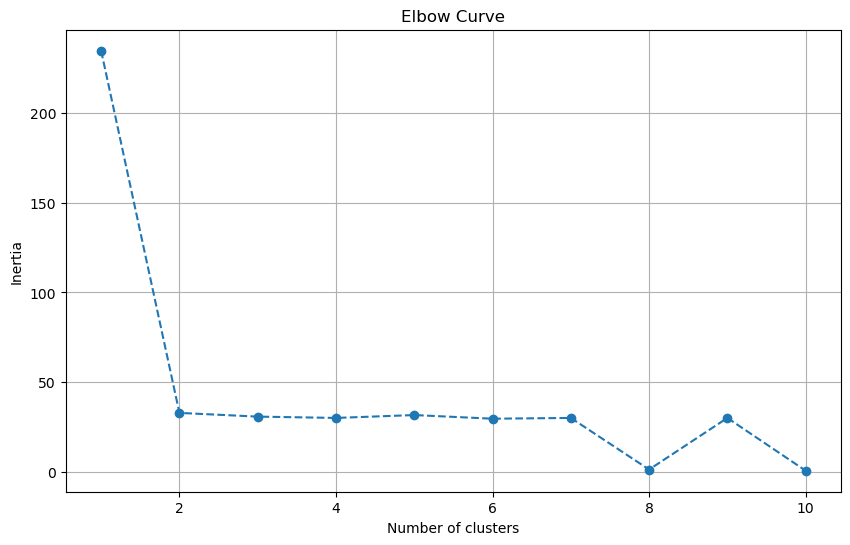

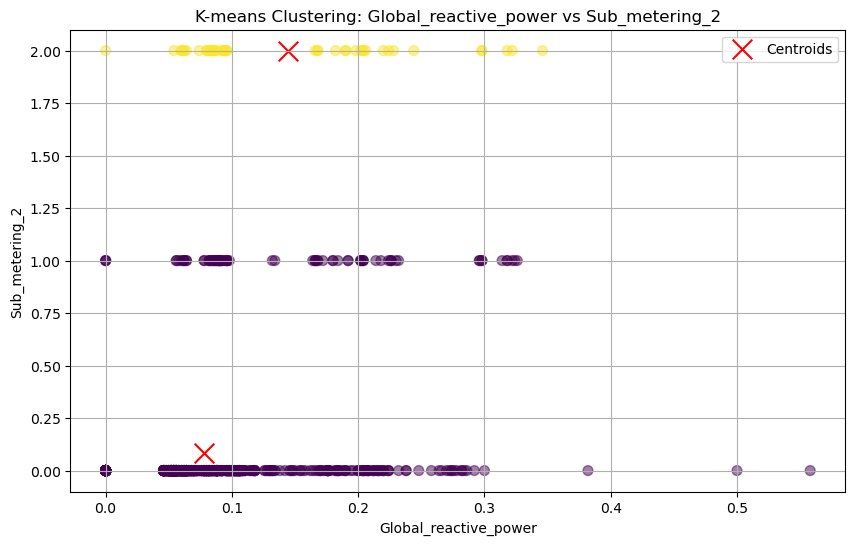

Average accuracy for K-means clustering: 50.84%
Inertia for 1 clusters: 40820.40048166399
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 171.6676852092374
Accuracy for 2 clusters: 74.78%
Inertia for 3 clusters: 63.357131477237665
Accuracy for 3 clusters: 74.58%
Inertia for 4 clusters: 60.41820418548147
Accuracy for 4 clusters: 55.72%
Inertia for 5 clusters: 59.67397869187637
Accuracy for 5 clusters: 36.44%


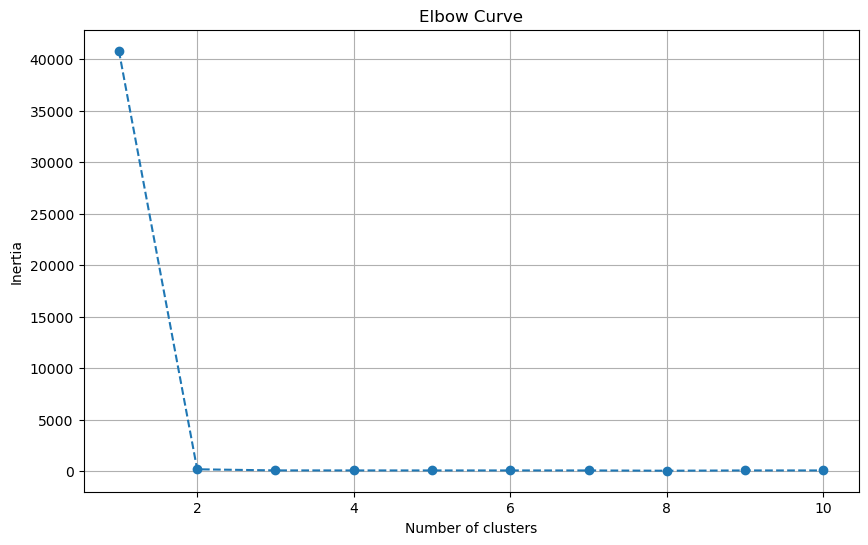

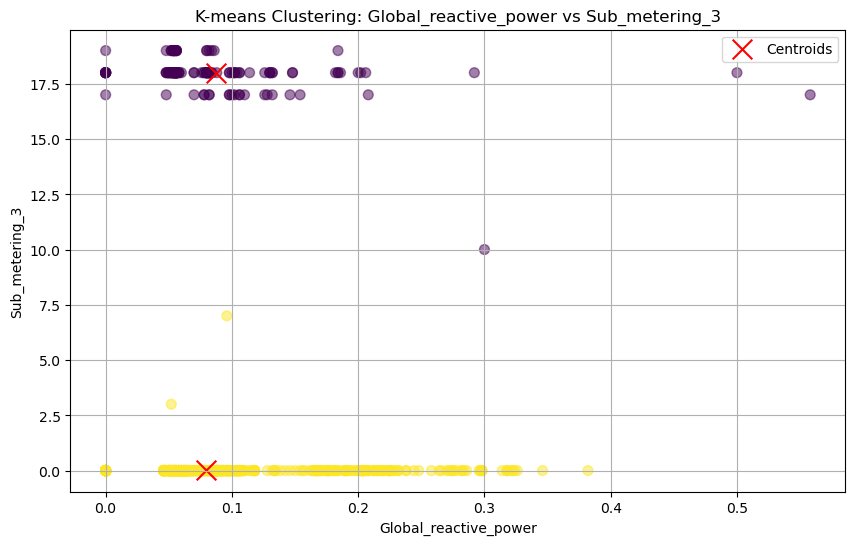

Average accuracy for K-means clustering: 31.83%
Inertia for 1 clusters: 16473.302535900002
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 5866.224587045075
Accuracy for 2 clusters: 59.59%
Inertia for 3 clusters: 3838.149256957234
Accuracy for 3 clusters: 35.46%
Inertia for 4 clusters: 2589.122050486698
Accuracy for 4 clusters: 27.57%
Inertia for 5 clusters: 2290.5973275943456
Accuracy for 5 clusters: 21.13%


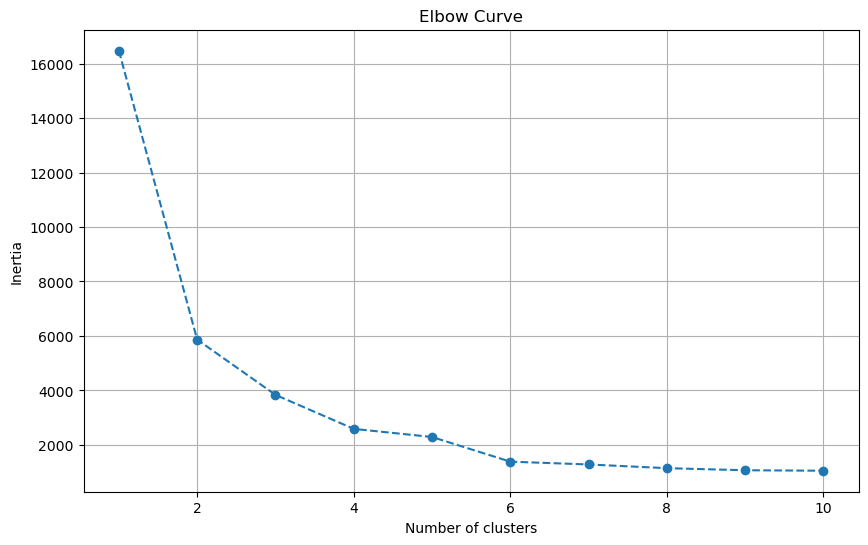

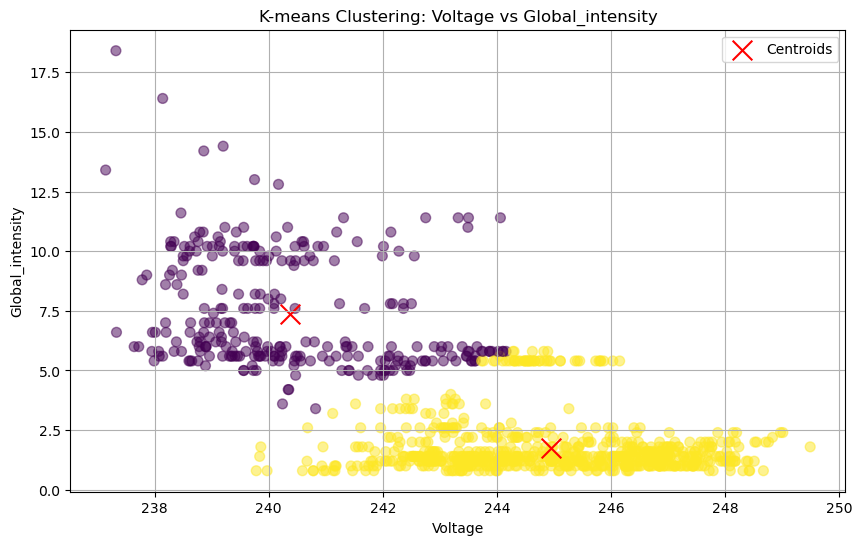

Average accuracy for K-means clustering: 30.62%
Inertia for 1 clusters: 7590.326575899999
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 2396.175855837877
Accuracy for 2 clusters: 52.60%
Inertia for 3 clusters: 870.4350834704084
Accuracy for 3 clusters: 35.15%
Inertia for 4 clusters: 536.0173583422055
Accuracy for 4 clusters: 25.50%
Inertia for 5 clusters: 395.52731006477273
Accuracy for 5 clusters: 22.12%


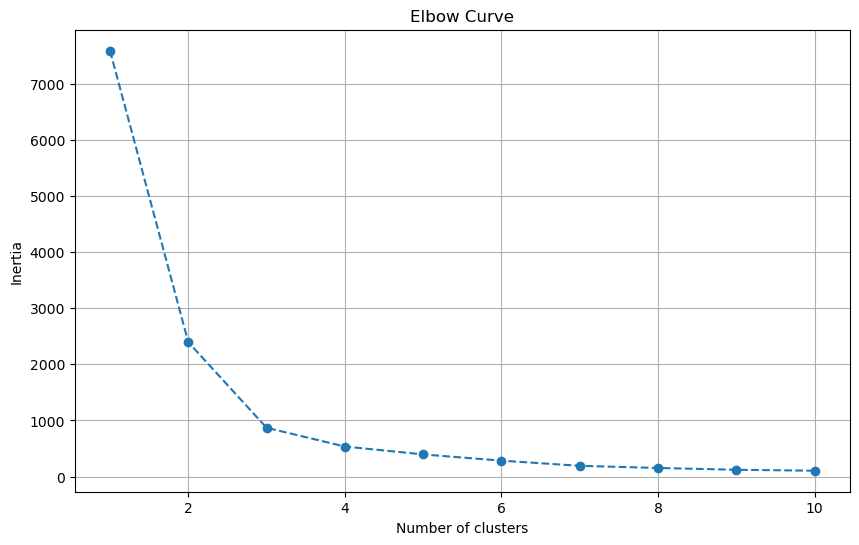

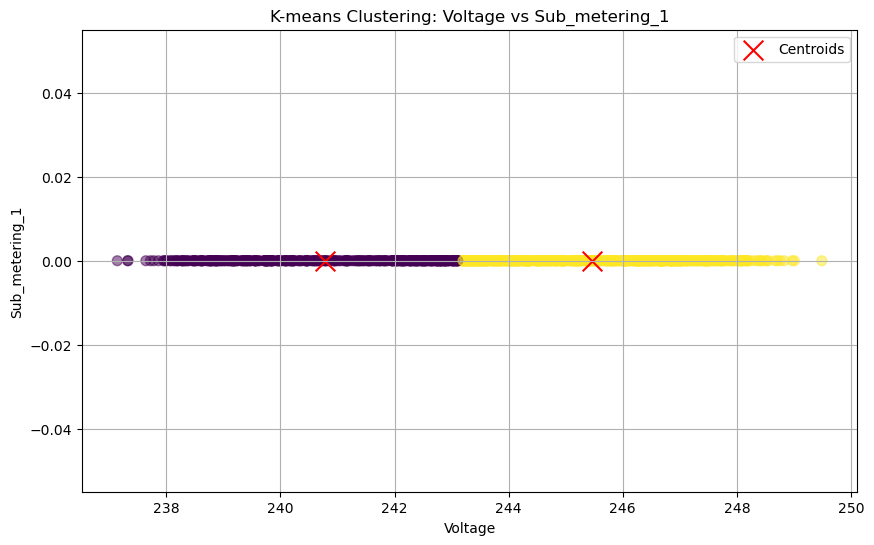

Average accuracy for K-means clustering: 30.95%
Inertia for 1 clusters: 7820.102575899999
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 2625.4271089812837
Accuracy for 2 clusters: 52.60%
Inertia for 3 clusters: 1099.3377539277908
Accuracy for 3 clusters: 35.27%
Inertia for 4 clusters: 764.5861829720103
Accuracy for 4 clusters: 25.50%
Inertia for 5 clusters: 619.9429186793606
Accuracy for 5 clusters: 21.61%


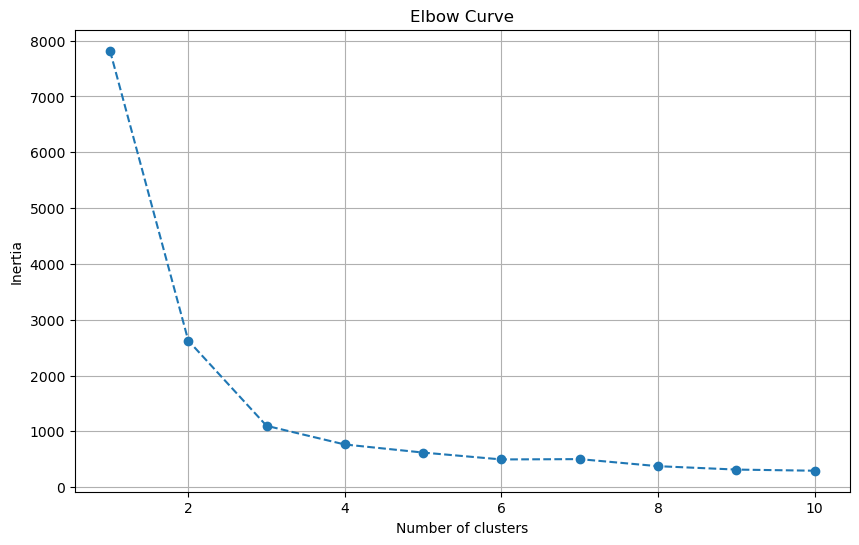

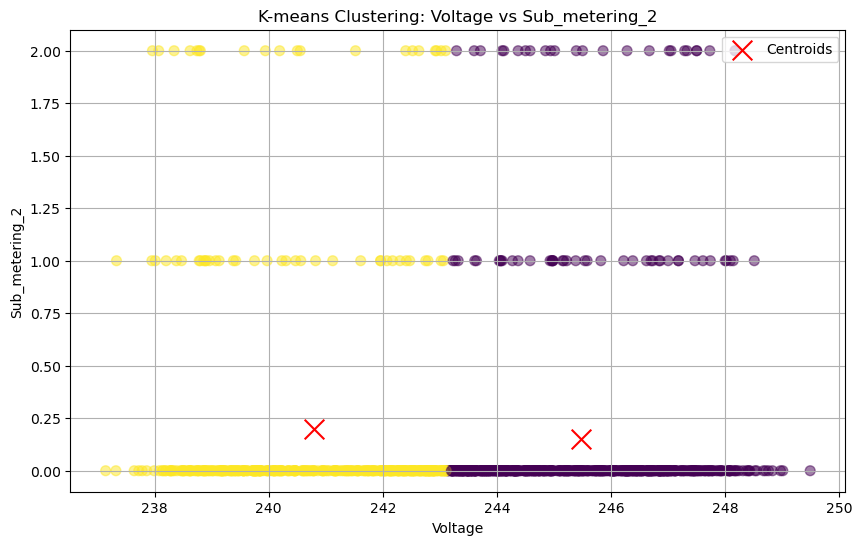

Average accuracy for K-means clustering: 34.36%
Inertia for 1 clusters: 48405.7655759
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 7440.528915667428
Accuracy for 2 clusters: 74.78%
Inertia for 3 clusters: 3002.8997793965154
Accuracy for 3 clusters: 38.77%
Inertia for 4 clusters: 1726.5441393773278
Accuracy for 4 clusters: 28.39%
Inertia for 5 clusters: 1027.4402388347403
Accuracy for 5 clusters: 27.34%


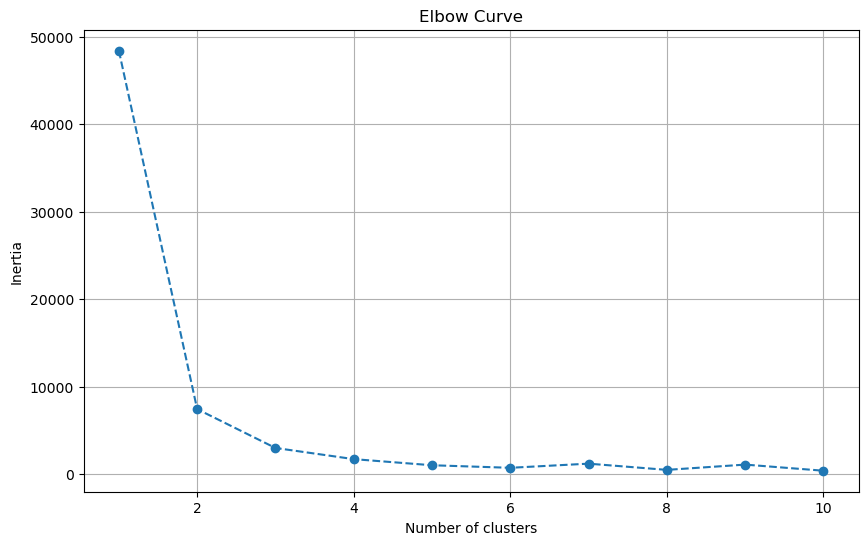

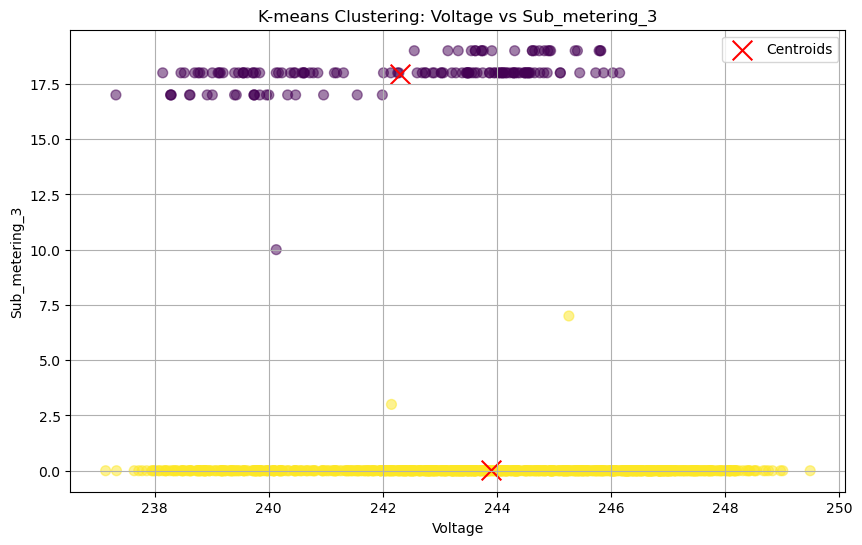

Average accuracy for K-means clustering: 39.40%
Inertia for 1 clusters: 8882.975960000002
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 1936.093008254803
Accuracy for 2 clusters: 56.20%
Inertia for 3 clusters: 1936.093008254803
Accuracy for 3 clusters: 56.20%
Inertia for 4 clusters: 426.1786349946717
Accuracy for 4 clusters: 37.55%
Inertia for 5 clusters: 401.1634268847269
Accuracy for 5 clusters: 25.09%


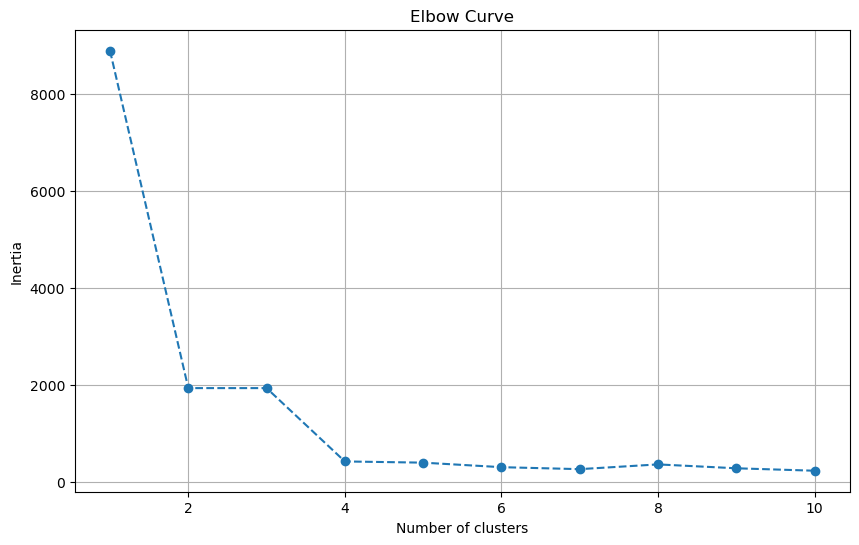

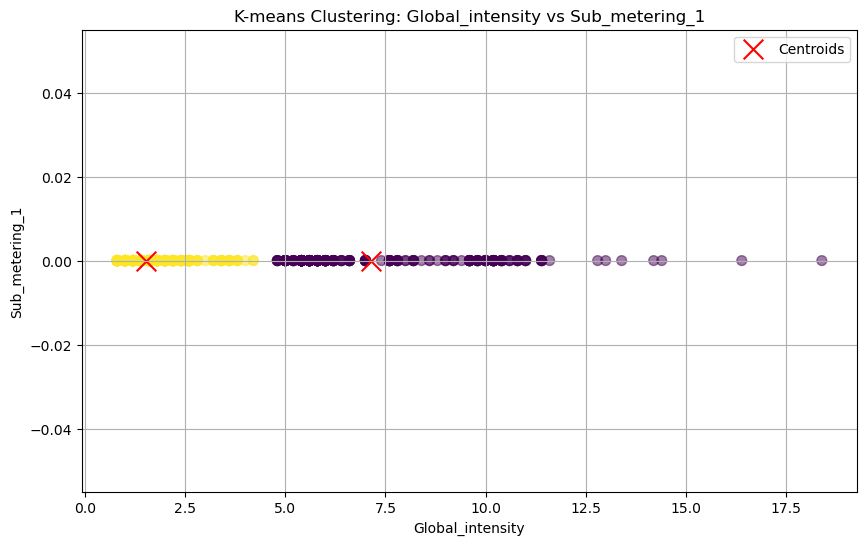

Average accuracy for K-means clustering: 39.46%
Inertia for 1 clusters: 9112.751960000001
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 2165.544392577982
Accuracy for 2 clusters: 56.20%
Inertia for 3 clusters: 1991.5478052110163
Accuracy for 3 clusters: 40.80%
Inertia for 4 clusters: 655.2501128952151
Accuracy for 4 clusters: 34.36%
Inertia for 5 clusters: 1993.9921334944436
Accuracy for 5 clusters: 38.47%


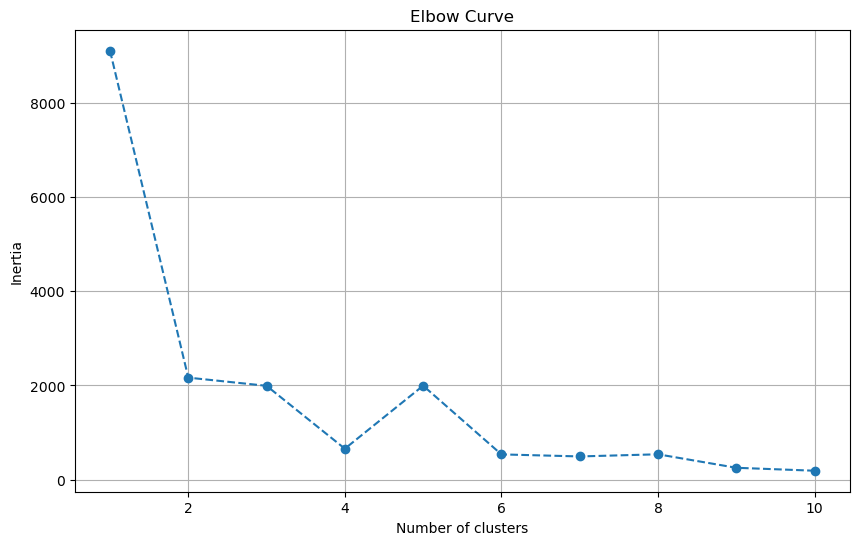

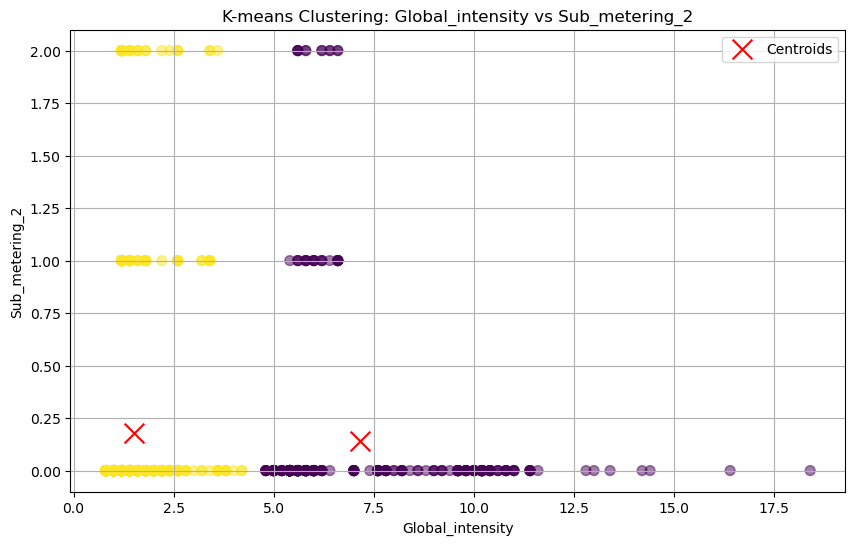

Average accuracy for K-means clustering: 38.83%
Inertia for 1 clusters: 49698.414959999995
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 5422.336898870701
Accuracy for 2 clusters: 74.78%
Inertia for 3 clusters: 1940.3190127654111
Accuracy for 3 clusters: 50.69%
Inertia for 4 clusters: 1775.1450944778044
Accuracy for 4 clusters: 33.45%
Inertia for 5 clusters: 1775.1450944778044
Accuracy for 5 clusters: 33.45%


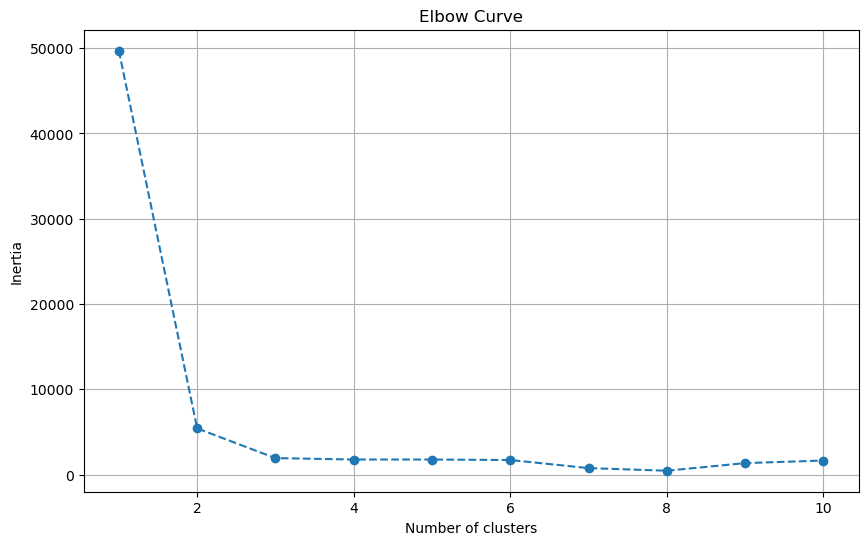

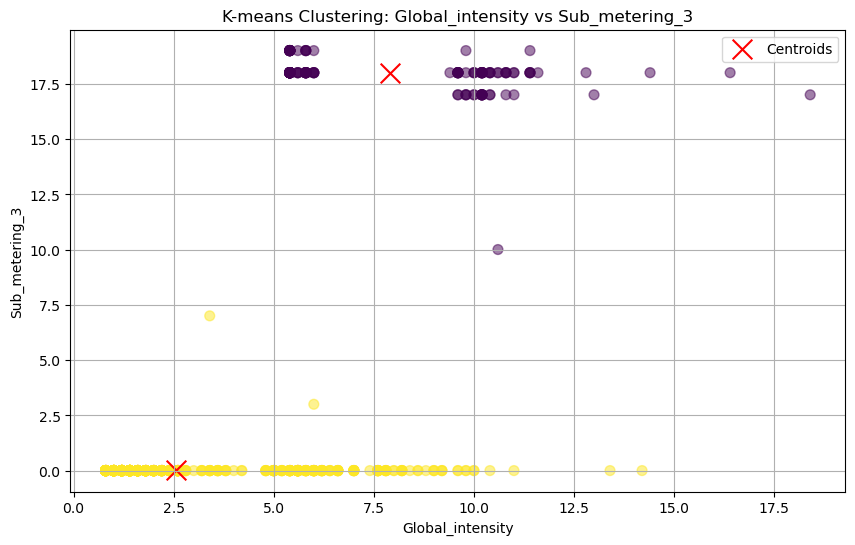

Average accuracy for K-means clustering: 80.51%
Inertia for 1 clusters: 229.77599999999998
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 28.53658536585366
Accuracy for 2 clusters: 78.43%
Inertia for 3 clusters: 28.53658536585366
Accuracy for 3 clusters: 78.43%
Inertia for 4 clusters: 0.0
Accuracy for 4 clusters: 77.72%
Inertia for 5 clusters: 28.53658536585366
Accuracy for 5 clusters: 78.43%


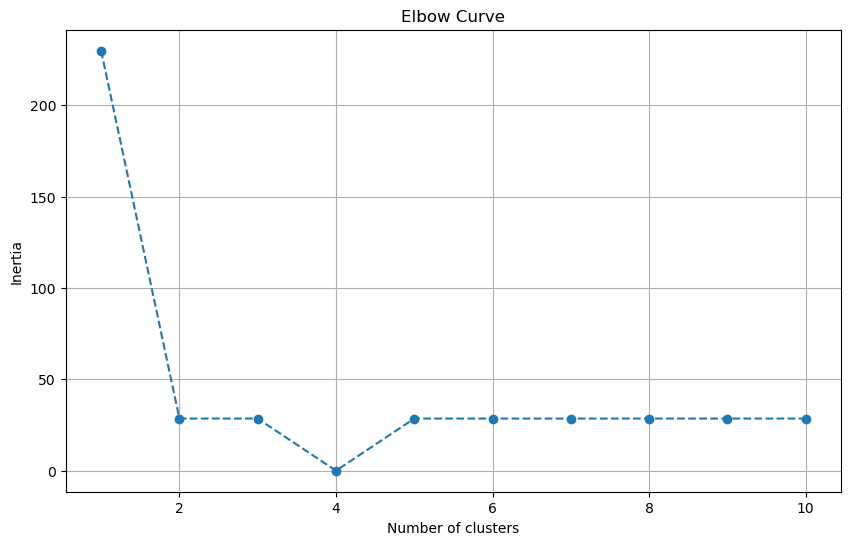

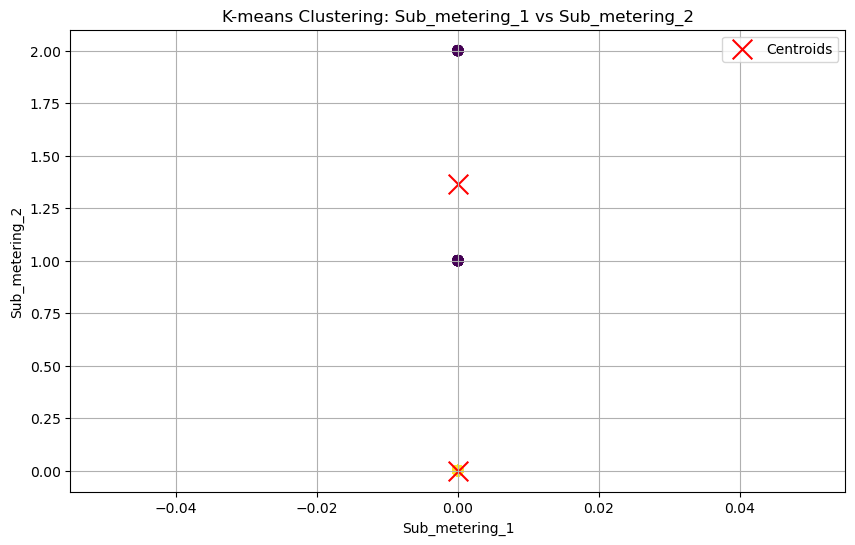

Average accuracy for K-means clustering: 76.92%
Inertia for 1 clusters: 40815.439
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 166.71371018906228
Accuracy for 2 clusters: 74.78%
Inertia for 3 clusters: 58.428199717019595
Accuracy for 3 clusters: 74.58%
Inertia for 4 clusters: 49.43877551020408
Accuracy for 4 clusters: 74.41%
Inertia for 5 clusters: 49.43877551020408
Accuracy for 5 clusters: 74.41%


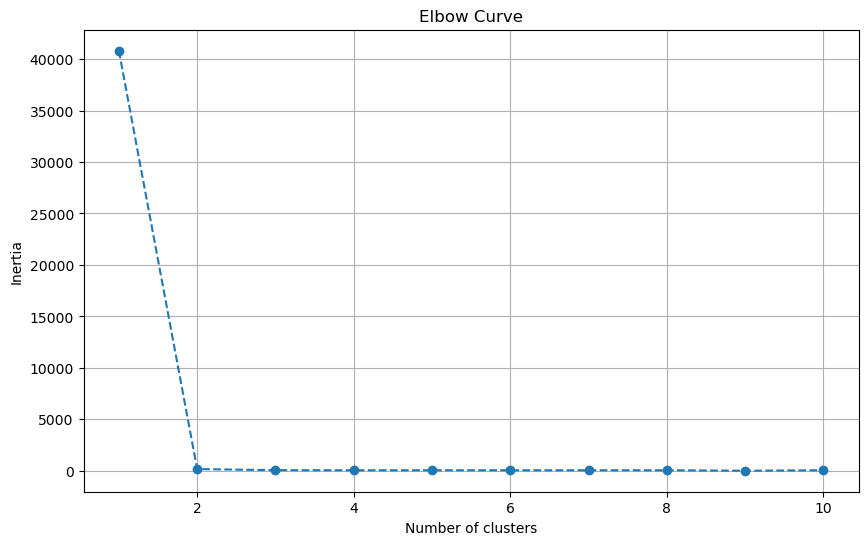

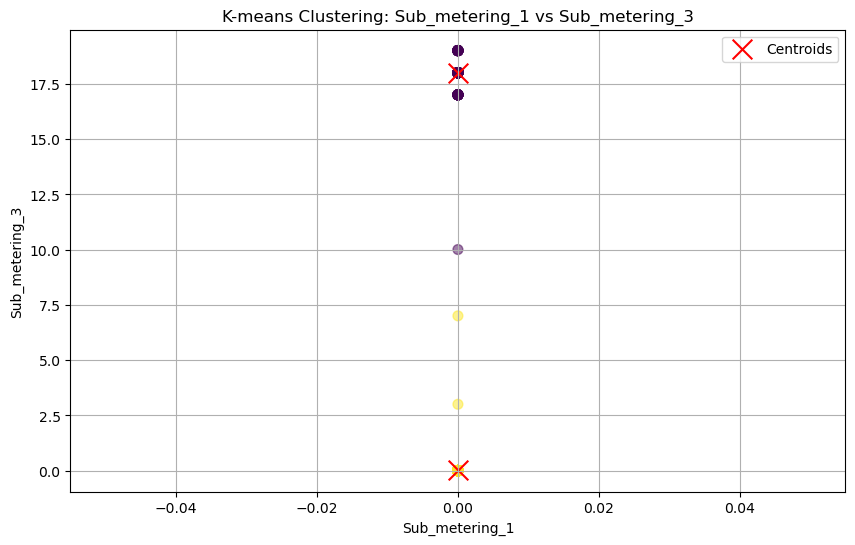

Average accuracy for K-means clustering: 62.38%
Inertia for 1 clusters: 41045.215
Accuracy for 1 clusters: 100.00%
Inertia for 2 clusters: 391.586949625682
Accuracy for 2 clusters: 74.78%
Inertia for 3 clusters: 195.23049223568643
Accuracy for 3 clusters: 56.85%
Inertia for 4 clusters: 86.96299823869509
Accuracy for 4 clusters: 56.67%
Inertia for 5 clusters: 136.57246790571614
Accuracy for 5 clusters: 55.42%


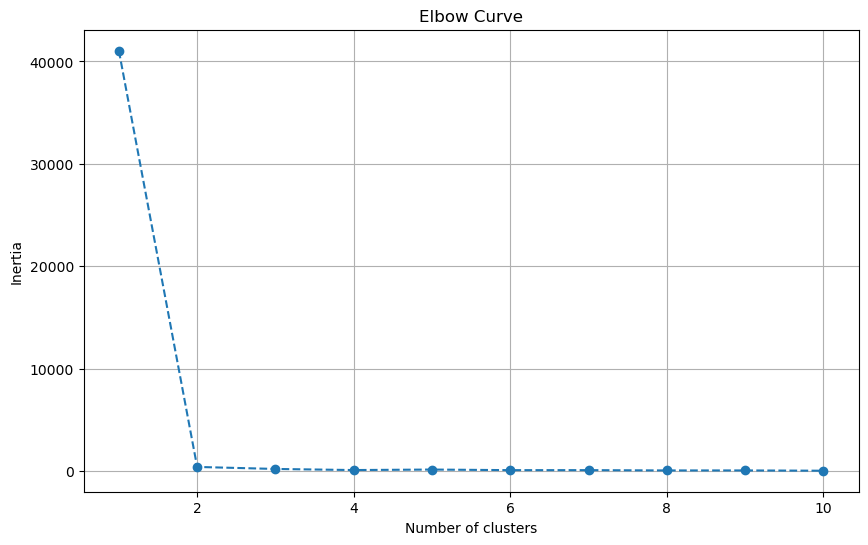

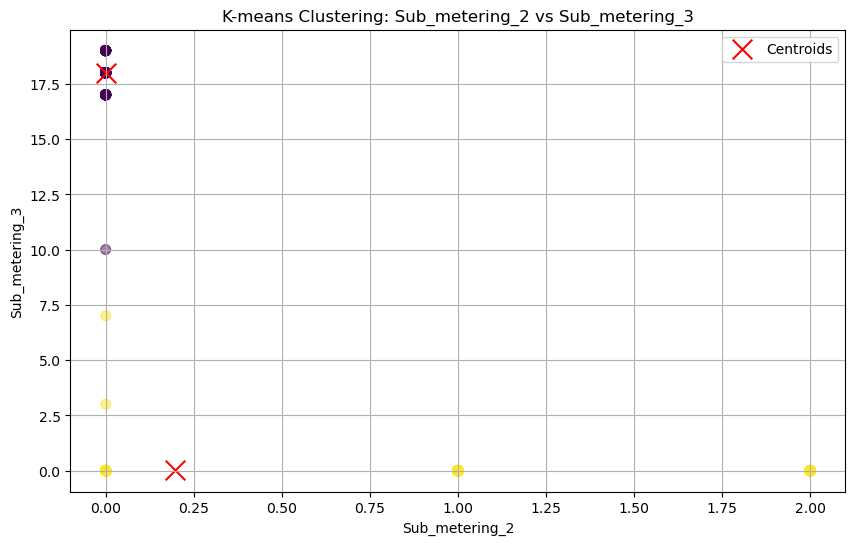

In [9]:
#best calclates by finding bigest change
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def assign_clusters(X, centroids):
    clusters = np.zeros(len(X))
    for i in range(len(X)):
        distances = [calculate_distance(X[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def update_centroids(X, clusters, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def kmeans(X, n_clusters, max_iterations=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iterations):
        # Assign clusters
        clusters = assign_clusters(X, centroids)
        
        # Update centroids
        new_centroids = update_centroids(X, clusters, n_clusters)

        # Check convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids

# Load the dataset
data = pd.read_csv("household_power_consumption.csv")

data = data.head(1000)

# Select the attributes for clustering
attributes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
              'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

import numpy as np

# Loop through each pair of attributes
for i in range(len(attributes)):
    for j in range(i+1, len(attributes)):
        X = data[[attributes[i], attributes[j]]].values

        # Elbow method to find the optimal number of clusters
        inertia = []
        accuracies = []
        for n_clusters in range(1, 11):
            clusters, centroids = kmeans(X, n_clusters)
            inertia.append(np.sum((X - centroids[clusters.astype(int)]) ** 2))

            # Calculate accuracy as the percentage of data points correctly assigned to clusters
            correct_assignments = sum(clusters == clusters[:, np.newaxis])  # Counting correctly assigned points
            accuracy = correct_assignments / len(X) * 100  # Calculate accuracy
            accuracies.append(accuracy)

        # Calculate average accuracy
        avg_accuracy = np.mean(accuracies)
        print(f"Average accuracy for K-means clustering: {avg_accuracy:.2f}%")

        # Print first 5 inertia and accuracy
        for n_clusters in range(1, 6):
            print(f"Inertia for {n_clusters} clusters: {inertia[n_clusters - 1]}")
            print(f"Accuracy for {n_clusters} clusters: {accuracies[n_clusters - 1].mean():.2f}%")

        # Calculate rate of change of inertia
        rate_of_change = [inertia[i] - inertia[i+1] for i in range(len(inertia)-1)]

        # Find the "elbow" point
        elbow_point = np.argmax(rate_of_change)

        # Plot the elbow curve
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.title('Elbow Curve')
        plt.grid(True)
        plt.show()

        # Perform K-means clustering with the optimal number of clusters
        optimal_n_clusters = elbow_point + 2  # Add 2 to account for 0-based indexing and +1 for the first value
        clusters, centroids = kmeans(X, optimal_n_clusters)

        # Plot the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
        plt.title('K-means Clustering: {} vs {}'.format(attributes[i], attributes[j]))
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.legend()
        plt.grid(True)
        plt.show()


Inertia for 1 clusters: 950550.2139999999
Inertia for 2 clusters: 454971.96528066526
Inertia for 3 clusters: 265586.2595677013
Inertia for 4 clusters: 189685.6814749557
Inertia for 5 clusters: 159249.29073605684
Average accuracy for K-means clustering: 32.24%
Inertia change: [0.5213593573703984, 0.19923798124878855, 0.07984909894801794, 0.032019761071663766, 0.030868246927306813, 0.017517257089913283, 0.016334678002197678, 0.014640710053710121, 0.007662743162868566]


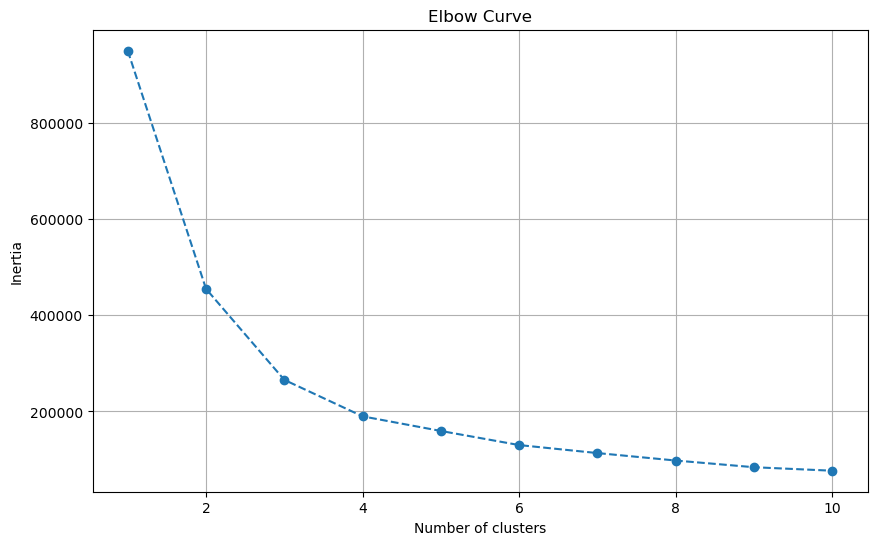

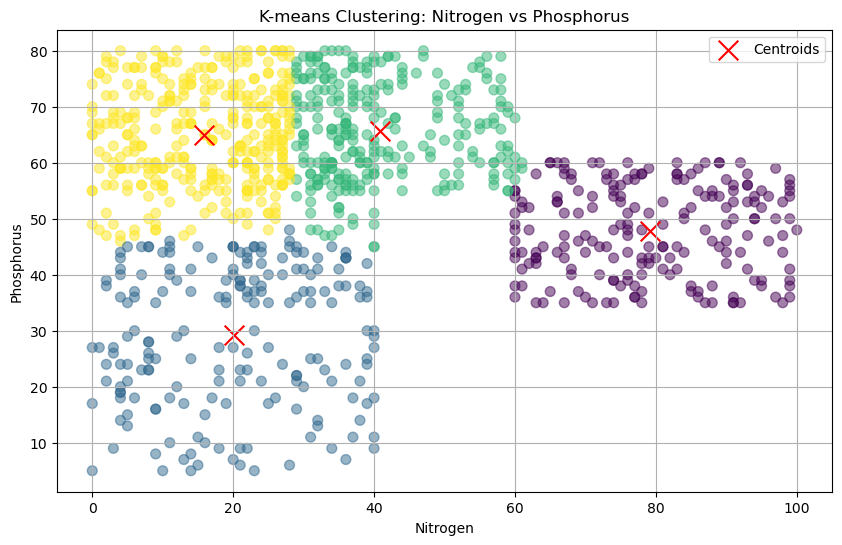

Inertia for 1 clusters: 1011103.695
Inertia for 2 clusters: 498235.39707623667
Inertia for 3 clusters: 414501.7399228235
Inertia for 4 clusters: 148534.77307238575
Inertia for 5 clusters: 124046.29680036588
Average accuracy for K-means clustering: 31.94%
Inertia change: [0.507236102943688, 0.08281411448448239, 0.2630461822715797, 0.02421954977824493, 0.020927660707382938, 0.021919528897766476, 0.006562584435023969, 0.0074446577865894, 0.012314519456622888]


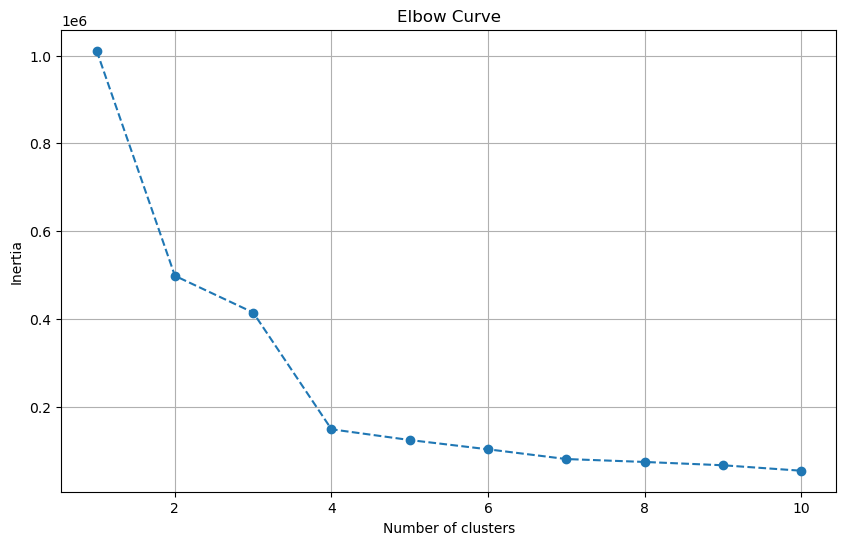

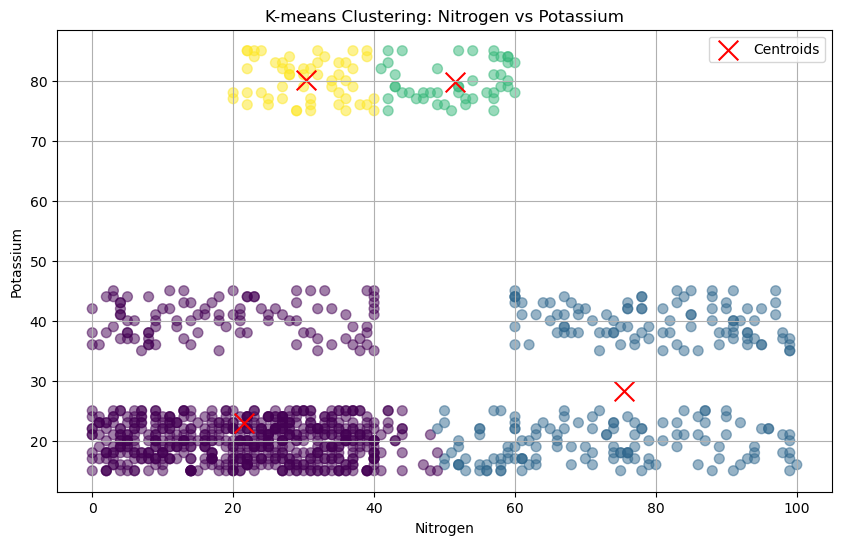

Inertia for 1 clusters: 681534.478504214
Inertia for 2 clusters: 187659.1392367821
Inertia for 3 clusters: 103708.95988005289
Inertia for 4 clusters: 64448.76178507848
Inertia for 5 clusters: 47699.06275469324
Average accuracy for K-means clustering: 31.76%
Inertia change: [0.7246520239905635, 0.1231781839430595, 0.057605593456020086, 0.0245764514616287, 0.006571208761743495, 0.0080367651835943, 0.012449563445469488, -0.0033349883729149577, 0.009535772308443852]


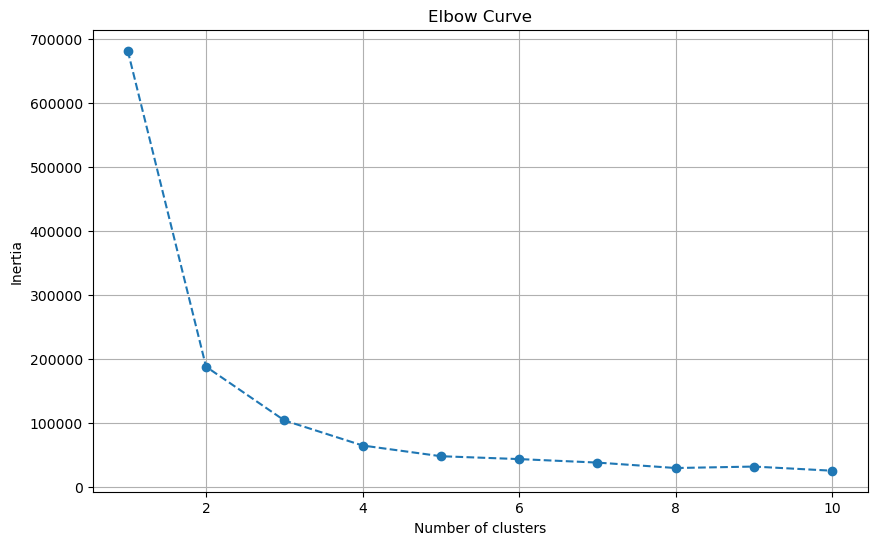

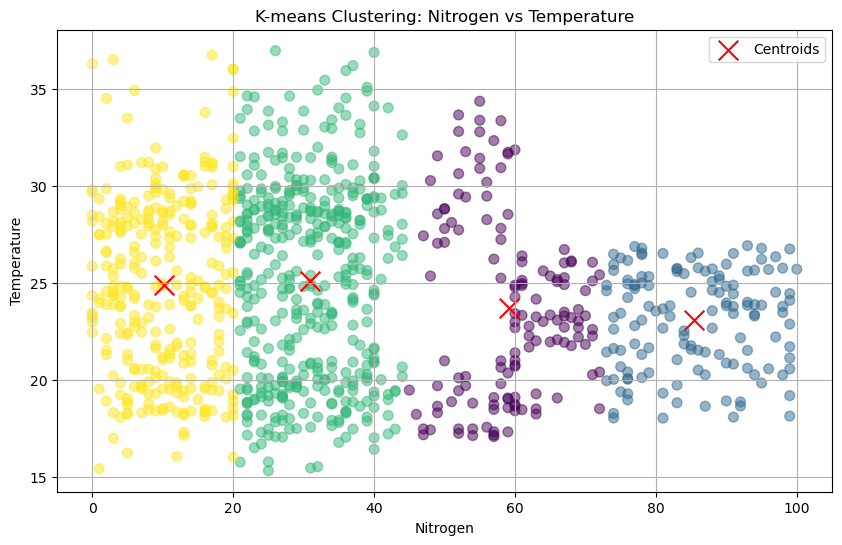

Inertia for 1 clusters: 1248869.8844682504
Inertia for 2 clusters: 722874.4240810182
Inertia for 3 clusters: 323807.1079909527
Inertia for 4 clusters: 231128.52180796594
Inertia for 5 clusters: 194487.25533986656
Average accuracy for K-means clustering: 31.82%
Inertia change: [0.42117715138210177, 0.31954274905106084, 0.07420996161057071, 0.02933953882929979, 0.03223524989036082, 0.01527215193467551, 0.026012072050041298, -0.0021807495492517405, 0.02082094709941866]


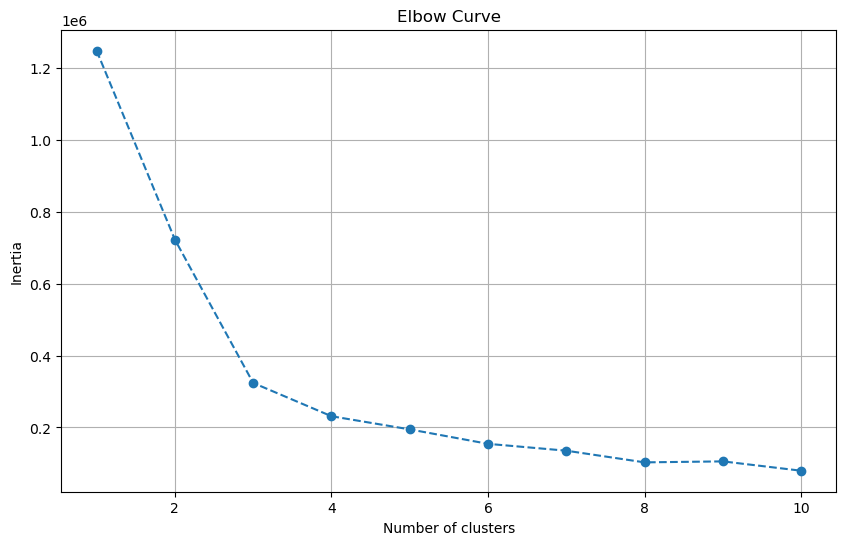

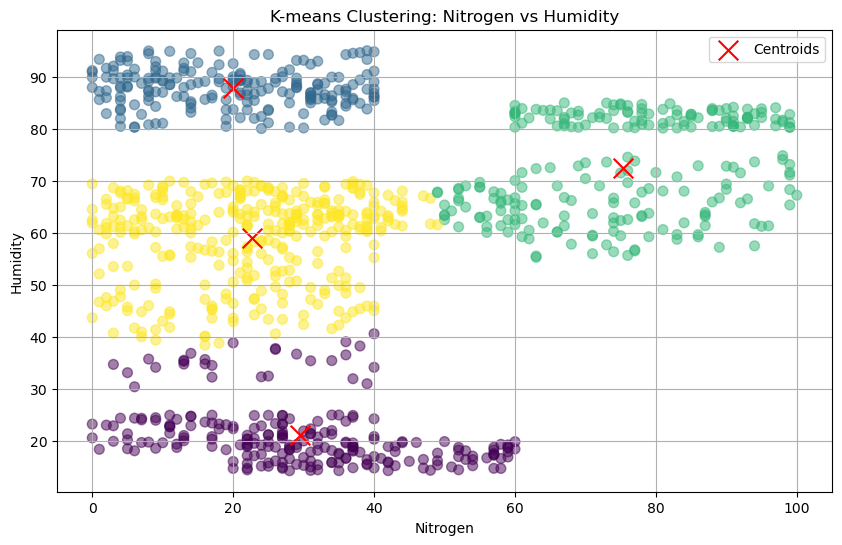

Inertia for 1 clusters: 661083.0943450211
Inertia for 2 clusters: 167668.97772728332
Inertia for 3 clusters: 83745.47852187847
Inertia for 4 clusters: 44755.238411250306
Inertia for 5 clusters: 27728.765278207065
Average accuracy for K-means clustering: 31.91%
Inertia change: [0.7463723105891793, 0.12694848790310306, 0.058979333224756535, 0.025755420579787323, 0.006389762070478936, 0.004985838512532328, 0.012729116124031147, 0.0016302332743569619, 0.0014692322338817534]


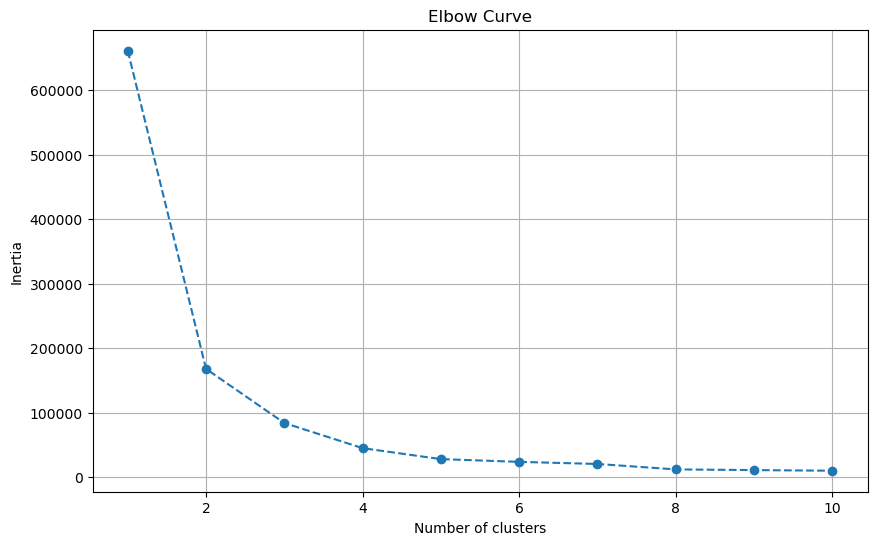

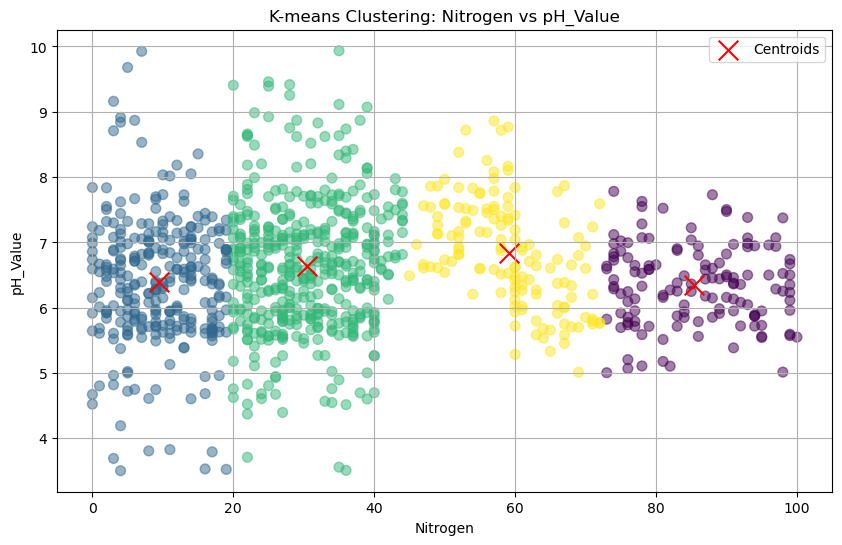

Inertia for 1 clusters: 4080058.1451928345
Inertia for 2 clusters: 1474586.7540013853
Inertia for 3 clusters: 919804.2399093506
Inertia for 4 clusters: 681662.3837516456
Inertia for 5 clusters: 517503.3320651911
Average accuracy for K-means clustering: 34.84%
Inertia change: [0.6385868285385201, 0.13597416859014252, 0.058367270191550136, 0.040234488295189684, 0.007045737540880171, 0.051302693608121376, -0.006256385588677624, 0.005560788897291327, 0.0025149057949133543]


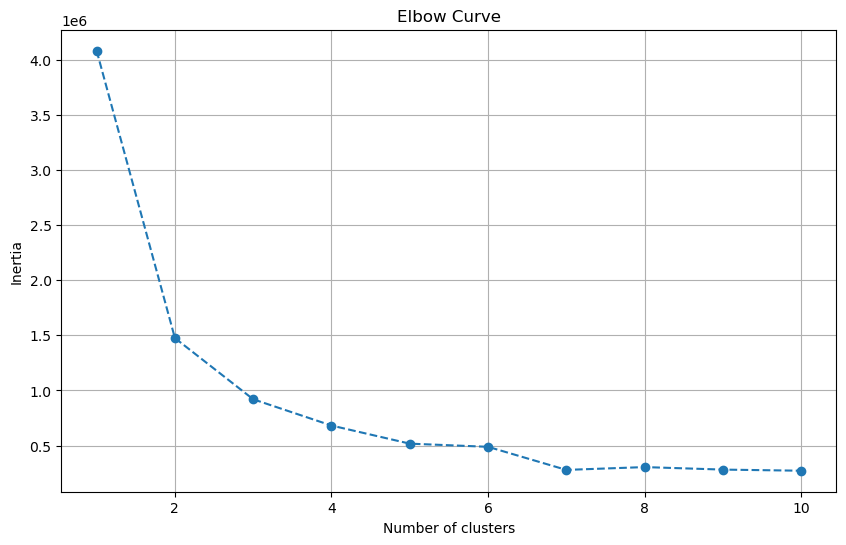

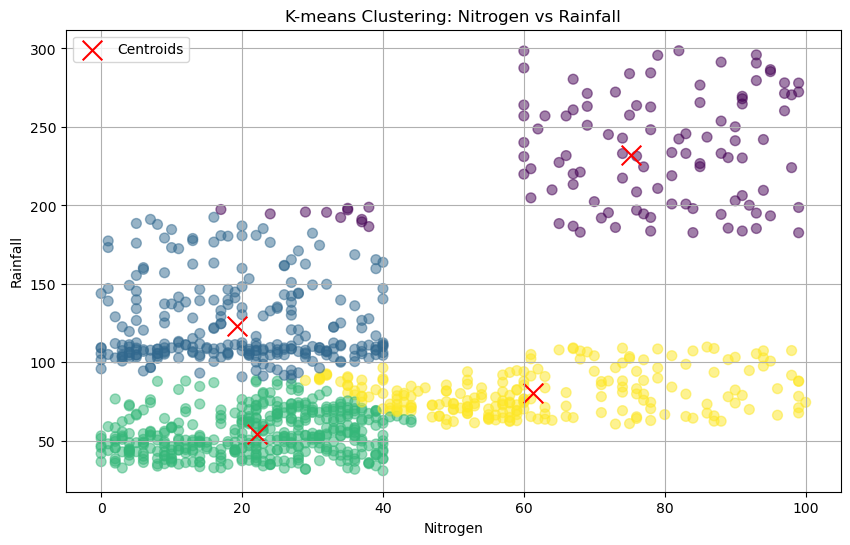

Inertia for 1 clusters: 641253.431
Inertia for 2 clusters: 358680.88078584603
Inertia for 3 clusters: 148961.3936480164
Inertia for 4 clusters: 88432.91258144104
Inertia for 5 clusters: 61931.48334617537
Average accuracy for K-means clustering: 34.57%
Inertia change: [0.44065658997488305, 0.3270461833019489, 0.09439088843888833, 0.0413275437668039, 0.036386383063278925, 0.006501537861491209, 0.007120572335127238, 5.6991278412633595e-05, 0.011937676418886076]


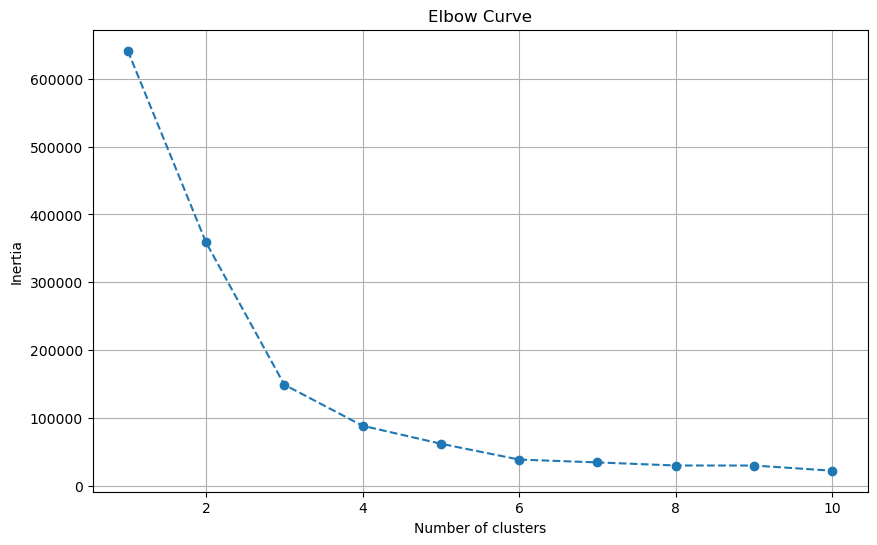

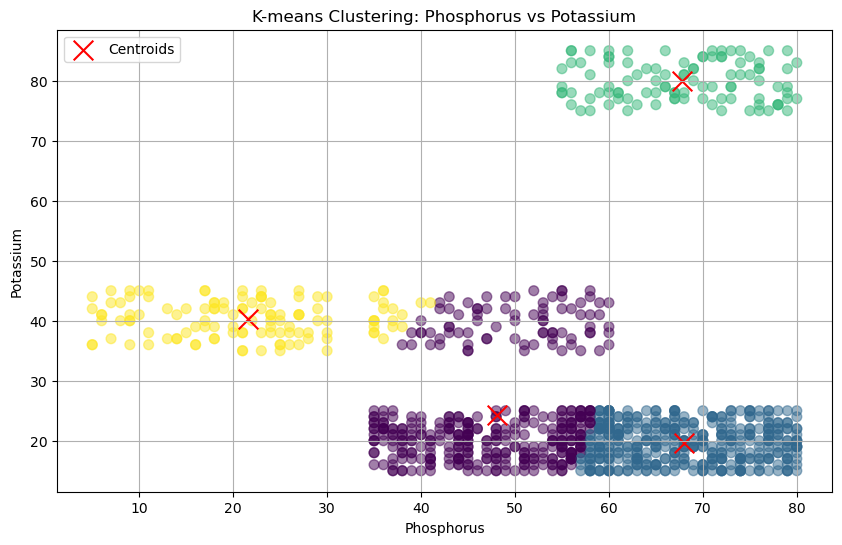

Inertia for 1 clusters: 311684.214504214
Inertia for 2 clusters: 116139.0964845609
Inertia for 3 clusters: 69914.4056144581
Inertia for 4 clusters: 41236.678928144654
Inertia for 5 clusters: 35183.49787316632
Average accuracy for K-means clustering: 31.25%
Inertia change: [0.6273821673346544, 0.1483061660457554, 0.09200891592129609, 0.019420877841397687, 0.02371093248011403, 0.01433711111102206, 0.009316215636198876, 0.006919166822027552, 0.009103453423236655]


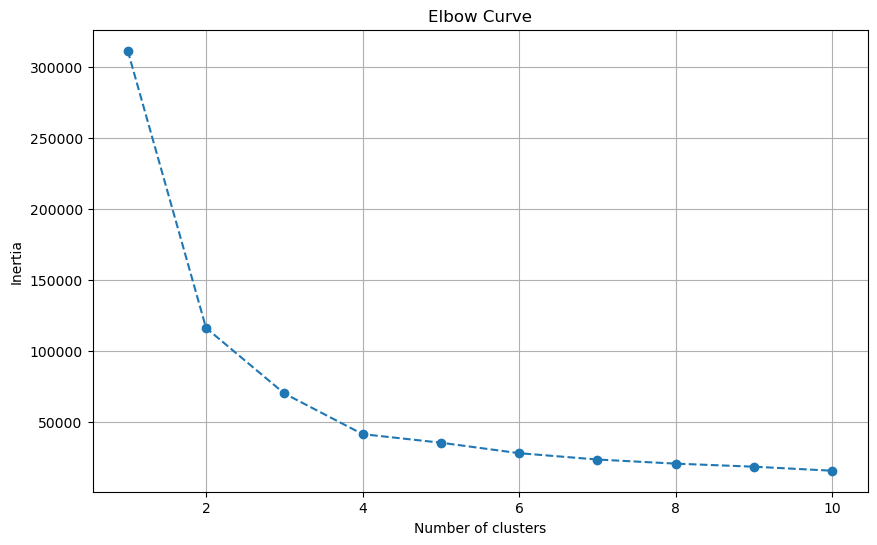

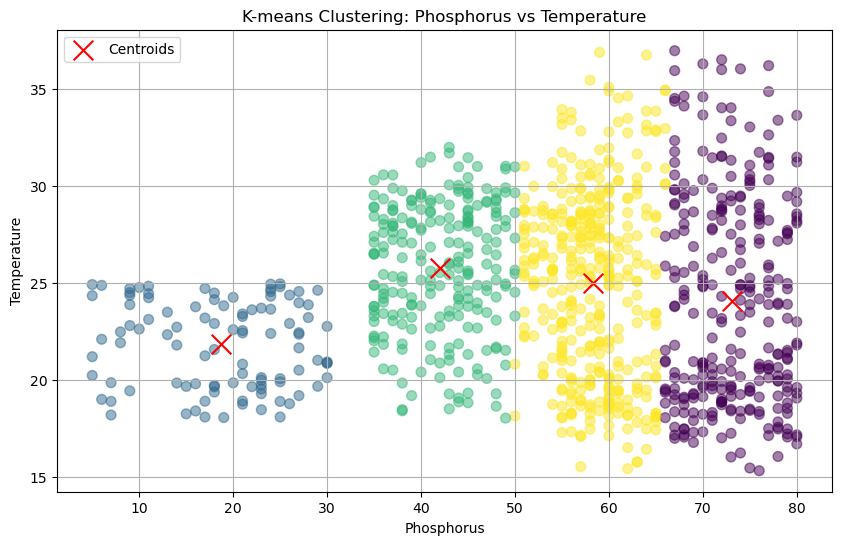

Inertia for 1 clusters: 879019.6204682505
Inertia for 2 clusters: 407256.8565157
Inertia for 3 clusters: 193309.5073142526
Inertia for 4 clusters: 132777.84540325304
Inertia for 5 clusters: 126883.28421436144
Average accuracy for K-means clustering: 31.26%
Inertia change: [0.5366919610978015, 0.2433931441569853, 0.06886269714748185, 0.006705835742041335, 0.05988920904230066, 0.014590523498131808, -0.0028632202608161843, 0.013116414688153671, 0.01756084965771175]


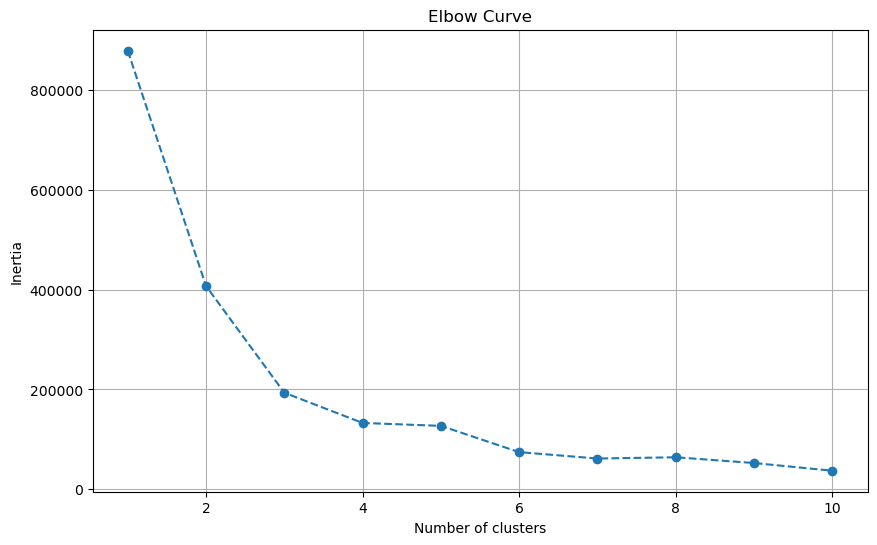

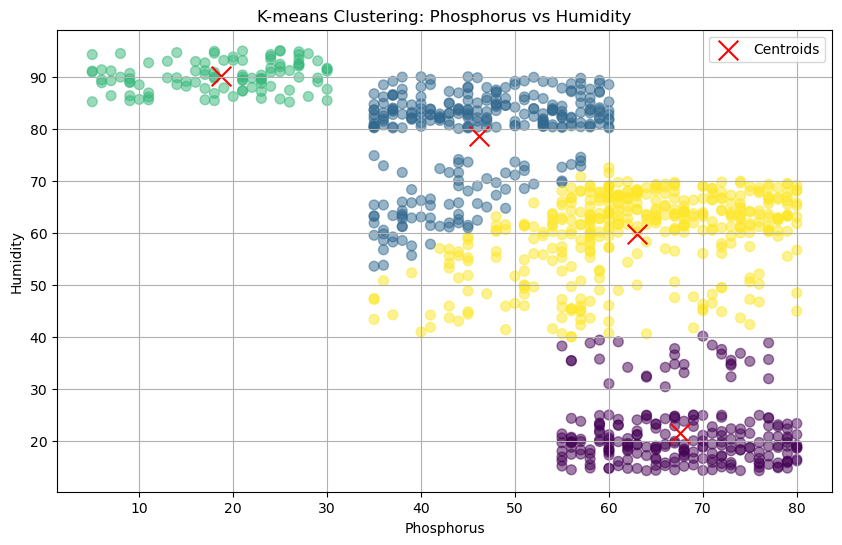

Inertia for 1 clusters: 291232.83034502104
Inertia for 2 clusters: 95688.94412630933
Inertia for 3 clusters: 49883.79583257643
Inertia for 4 clusters: 21934.377049112252
Inertia for 5 clusters: 16354.173857456626
Average accuracy for K-means clustering: 31.50%
Inertia change: [0.6714348996541789, 0.1572801673474379, 0.09596932718867147, 0.019160625486641762, 0.012457298868739674, 0.00471240317967976, 0.0011022274699263746, 0.018173290257675792, -0.00716964997986314]


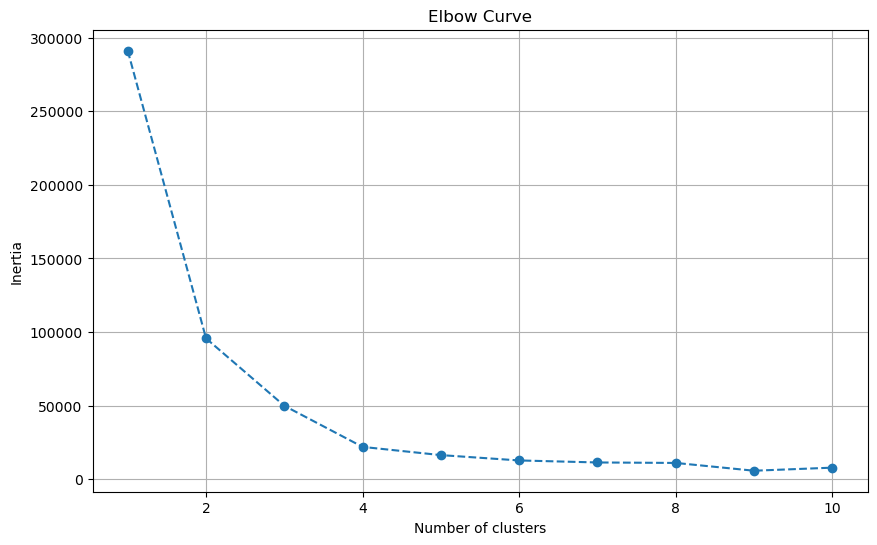

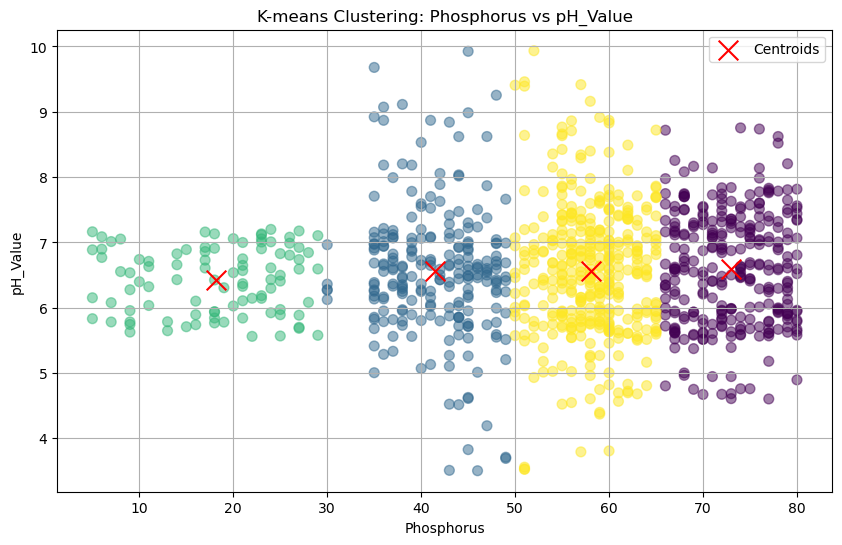

Inertia for 1 clusters: 3710207.881192835
Inertia for 2 clusters: 1199815.7488423346
Inertia for 3 clusters: 679956.3539329635
Inertia for 4 clusters: 555594.6901589618
Inertia for 5 clusters: 363445.39479958813
Average accuracy for K-means clustering: 34.71%
Inertia change: [0.6766176485893851, 0.1401159750494185, 0.03351878594307208, 0.05178936100410565, 0.02806631594661799, 0.010822620952137601, 0.005244544590204694, 0.010656275631504014, 0.0021725910239969695]


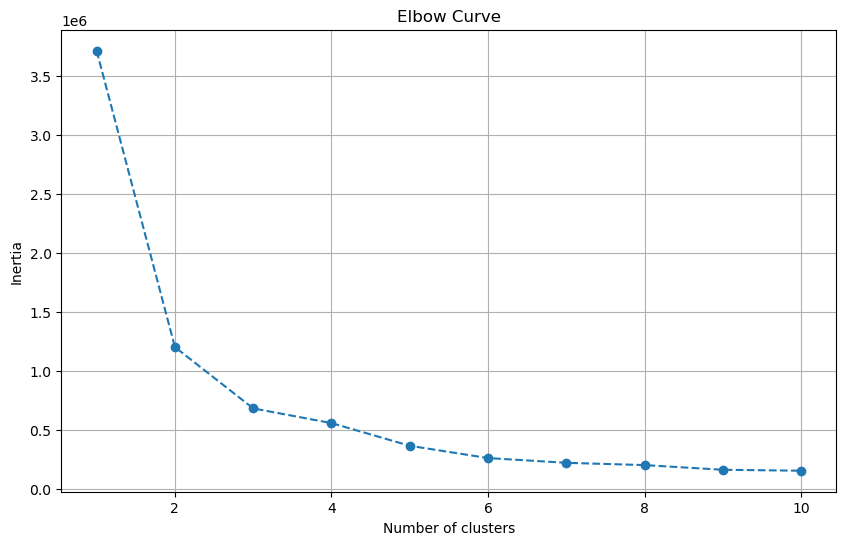

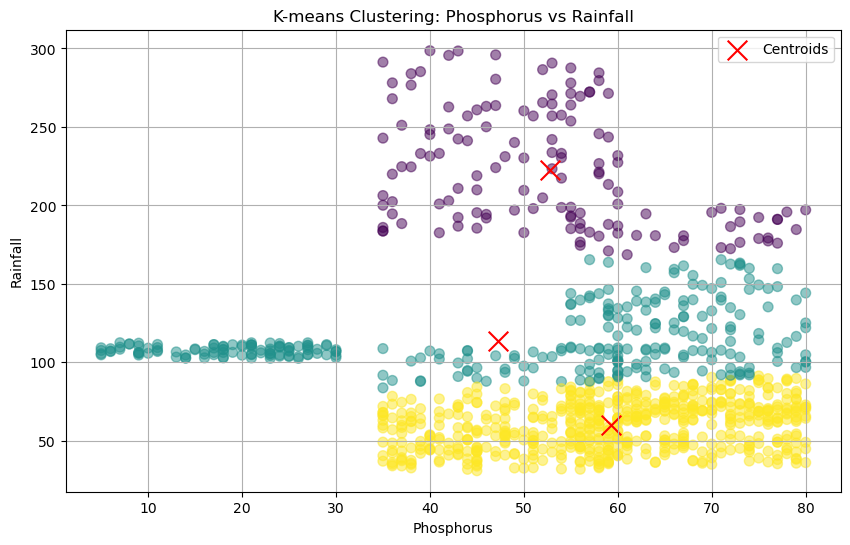

Inertia for 1 clusters: 372237.69550421403
Inertia for 2 clusters: 90478.94464513256
Inertia for 3 clusters: 25454.98237884933
Inertia for 4 clusters: 14972.249056398268
Inertia for 5 clusters: 11689.795311602073
Average accuracy for K-means clustering: 36.02%
Inertia change: [0.7569323425920783, 0.17468398029437915, 0.028161396465373262, 0.008818165877450839, 0.004658119628083872, 0.003019494020565766, 0.0012790799302694242, 0.004530109818838161, 0.001342156278515655]


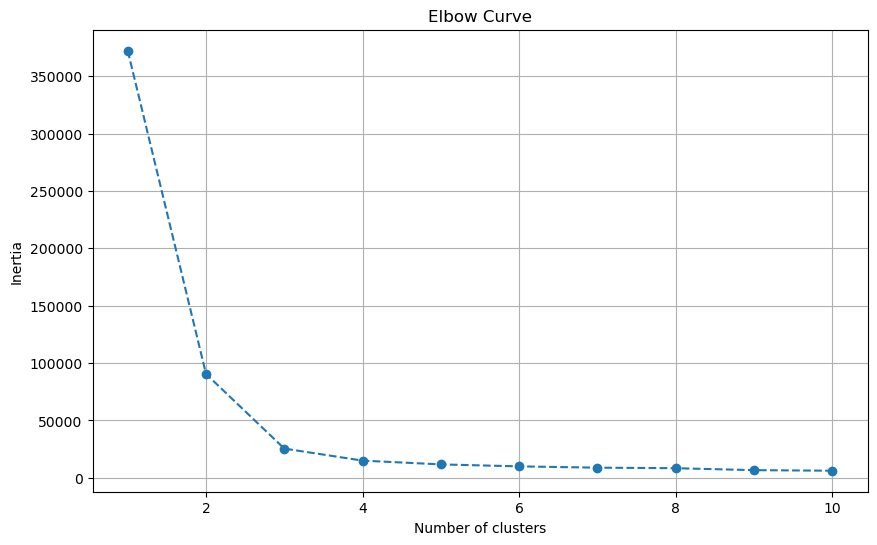

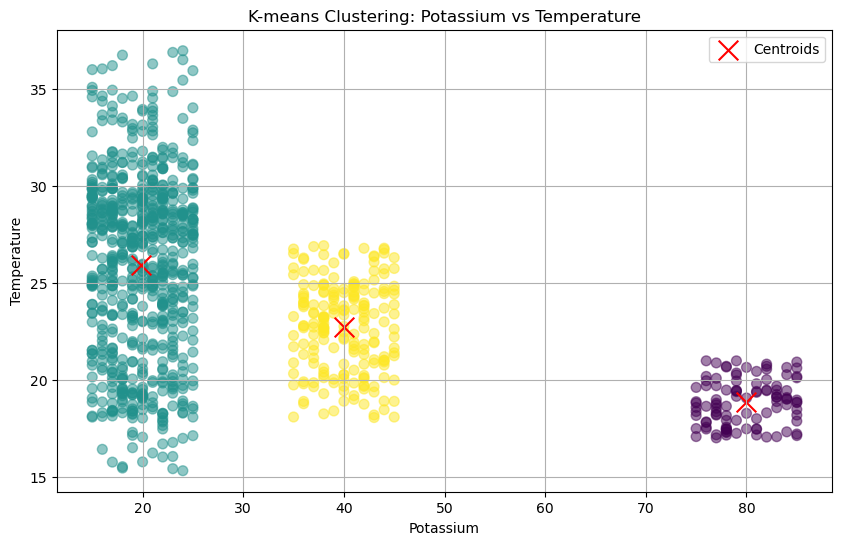

Inertia for 1 clusters: 939573.1014682504
Inertia for 2 clusters: 431828.60554489493
Inertia for 3 clusters: 269786.32260599115
Inertia for 4 clusters: 73259.28835262856
Inertia for 5 clusters: 45902.72450249071
Average accuracy for K-means clustering: 34.52%
Inertia change: [0.540399139917814, 0.17246373133254222, 0.2091663053638446, 0.029115950432582992, 0.021027257454637162, 0.0034995361765711394, 0.0044706881710683205, 0.0034995361765711394, 0.0012781519665114646]


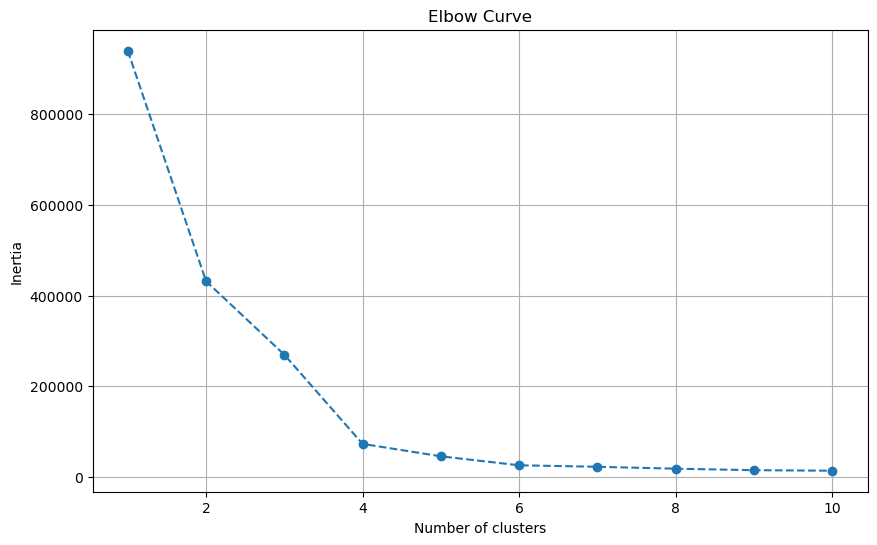

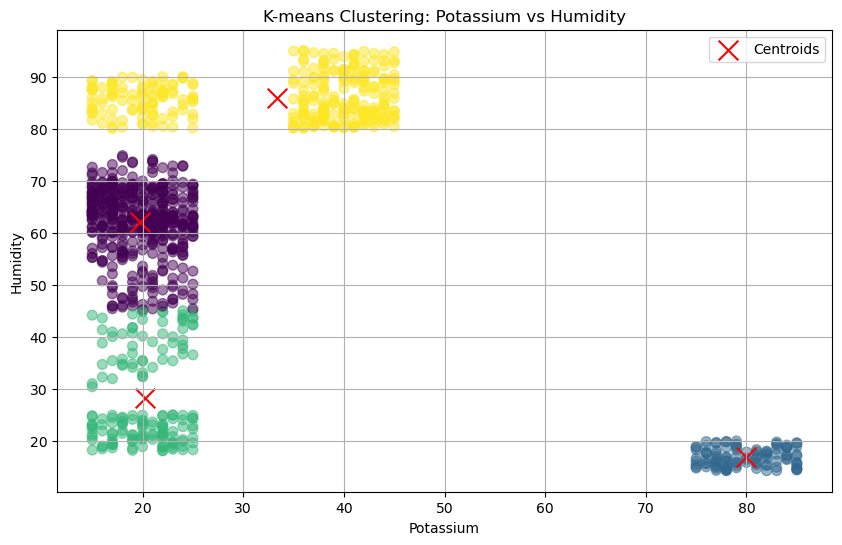

Inertia for 1 clusters: 351786.311345021
Inertia for 2 clusters: 73585.74563154331
Inertia for 3 clusters: 10112.311208697092
Inertia for 4 clusters: 5317.124331546017
Inertia for 5 clusters: 4410.990862078583
Average accuracy for K-means clustering: 37.25%
Inertia change: [0.7908226009414768, 0.18043179161850176, 0.013630964942374082, 0.002575806505952208, 0.00075163226705335, 0.0007600410815532514, 0.0028289351988991787, -0.00024348627762920666, 0.0015286192029499717]


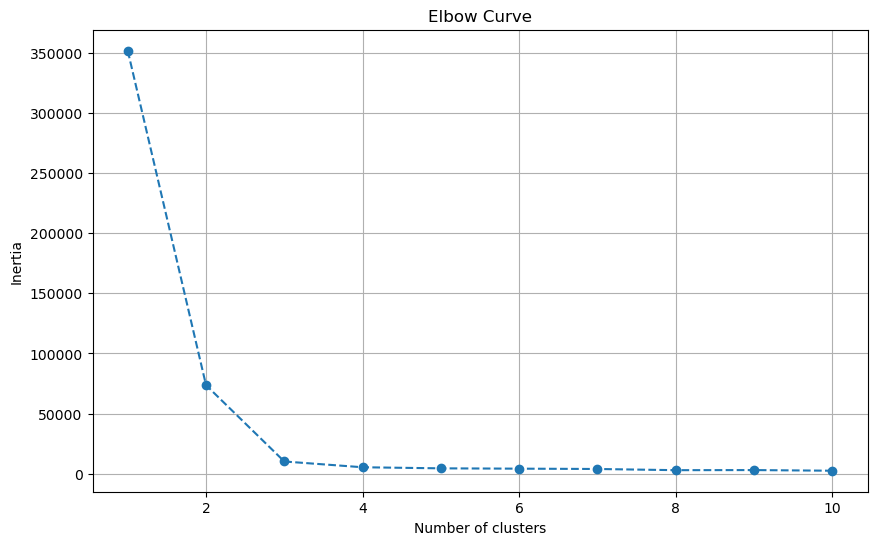

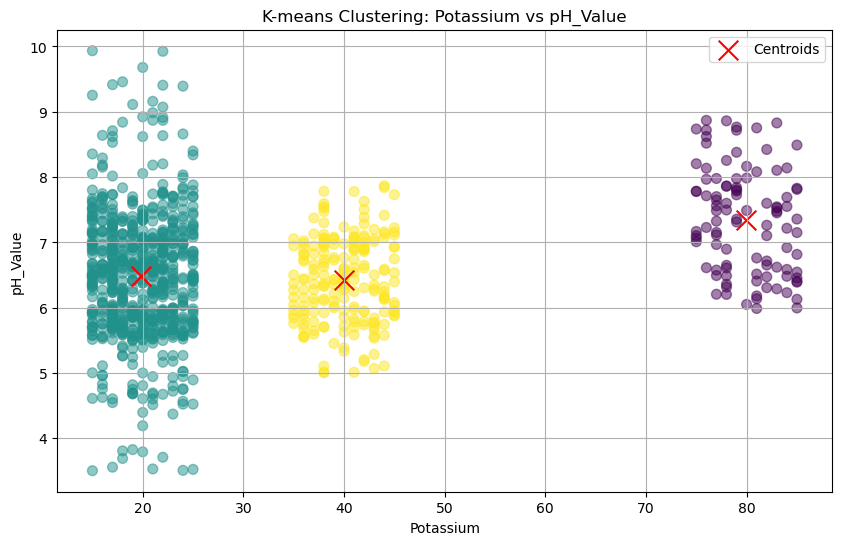

Inertia for 1 clusters: 3770761.362192835
Inertia for 2 clusters: 1259571.3539823191
Inertia for 3 clusters: 712232.347728976
Inertia for 4 clusters: 424336.2875523728
Inertia for 5 clusters: 351595.7147513042
Average accuracy for K-means clustering: 34.38%
Inertia change: [0.6659636521655052, 0.14515344612925743, 0.0763495836843892, 0.019290685836127086, 0.0011547634599196387, 0.05103112237258247, 0.0024055228243687354, 0.0013544087967946644, 0.0011576954208774295]


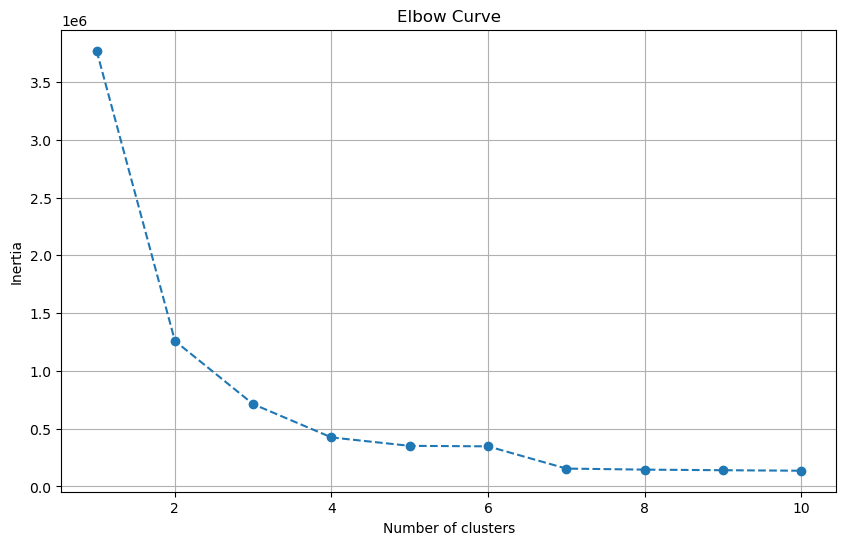

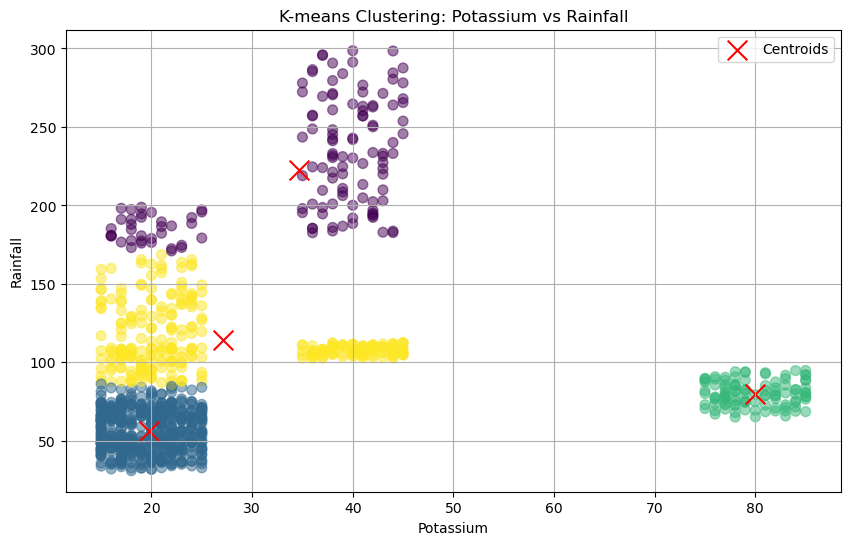

Inertia for 1 clusters: 610003.8849724645
Inertia for 2 clusters: 161465.72507383366
Inertia for 3 clusters: 58540.67573993732
Inertia for 4 clusters: 53951.7361072399
Inertia for 5 clusters: 28284.58064024627
Average accuracy for K-means clustering: 33.52%
Inertia change: [0.7353037758421453, 0.16872851447256335, 0.007522803945592183, 0.042077036063716614, 0.00769898715253494, 0.002285598733467487, 0.00932543000357289, 0.0021454929379516132, -0.006798935621015446]


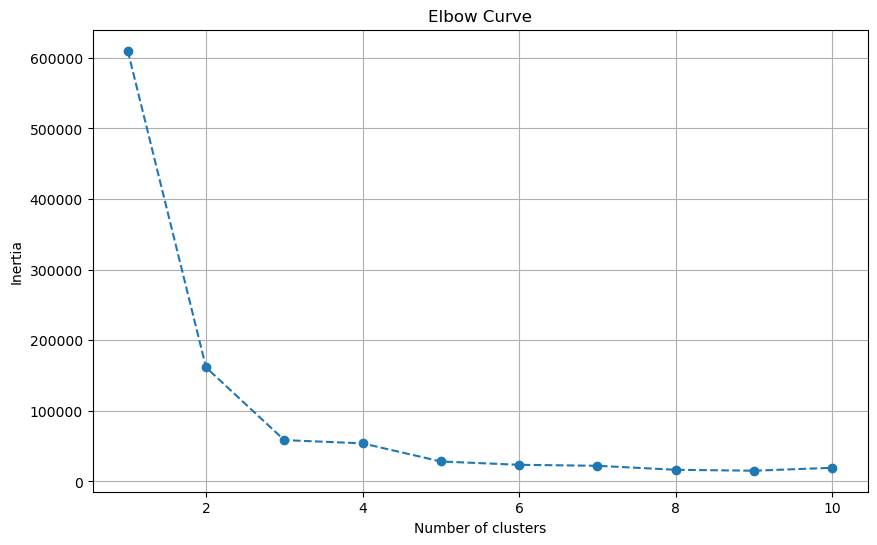

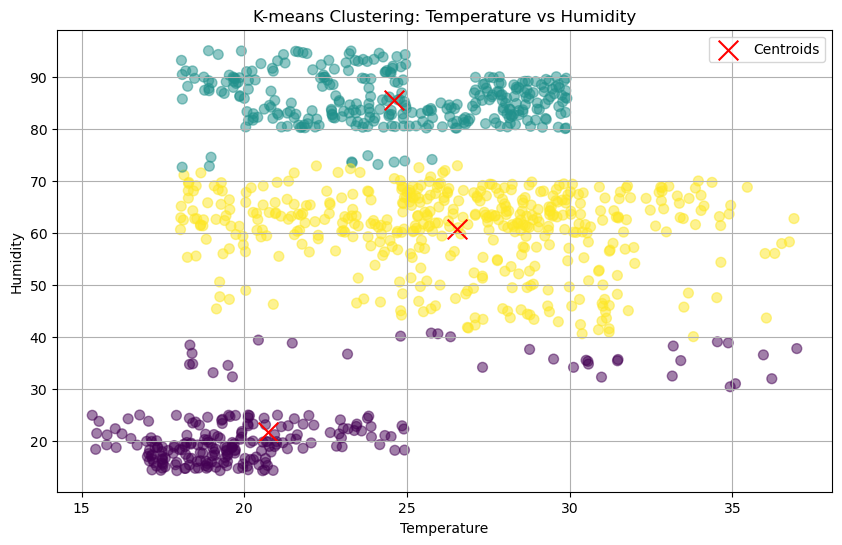

Inertia for 1 clusters: 22217.09484923502
Inertia for 2 clusters: 7020.165409529615
Inertia for 3 clusters: 3783.236338784358
Inertia for 4 clusters: 2578.0006081931933
Inertia for 5 clusters: 2040.7215602220588
Average accuracy for K-means clustering: 30.59%
Inertia change: [0.6840196498611368, 0.14569542474887132, 0.05424812464320299, 0.02418313697704874, 0.007542312886807279, 0.0185970874594234, 0.005137480398879527, 0.004871915366402467, 0.005746584117113365]


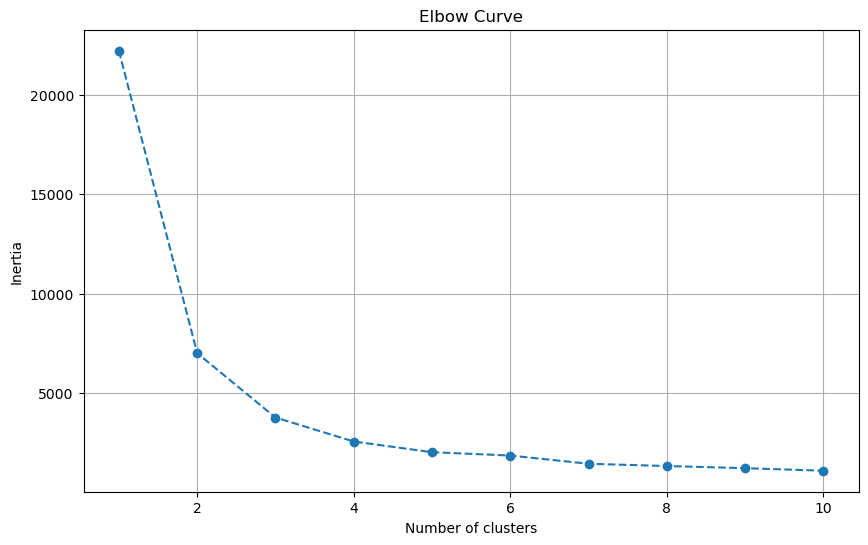

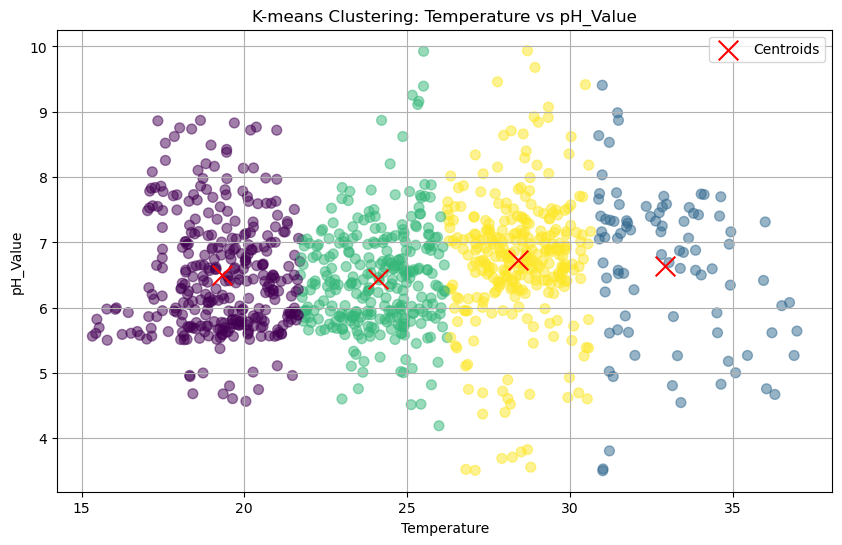

Inertia for 1 clusters: 3441192.145697049
Inertia for 2 clusters: 930901.7472597022
Inertia for 3 clusters: 432419.8548053494
Inertia for 4 clusters: 331496.52264065354
Inertia for 5 clusters: 162882.22212781338
Average accuracy for K-means clustering: 34.32%
Inertia change: [0.7294827757805606, 0.14485732599316398, 0.029328014214751955, 0.048998804302072936, 0.008054171413957204, 0.002699711512603759, 0.012225306685173907, 0.007026042023935414, -0.004781450062539078]


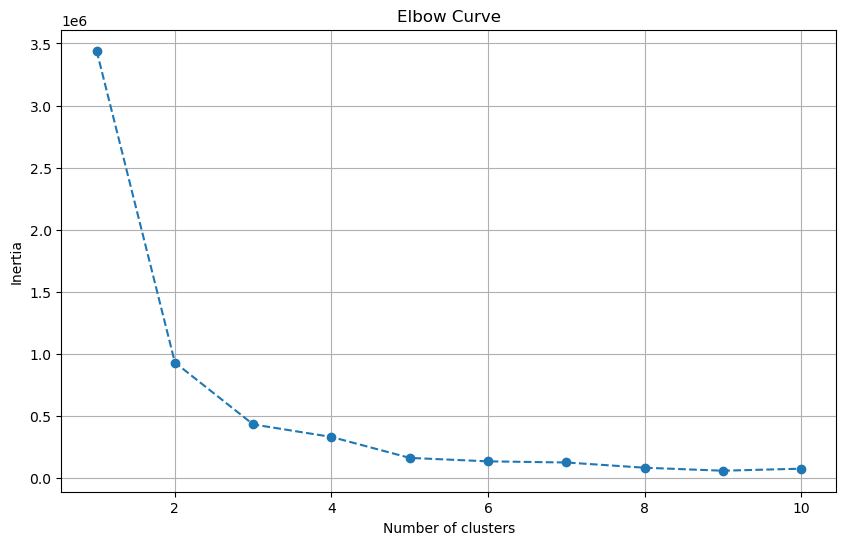

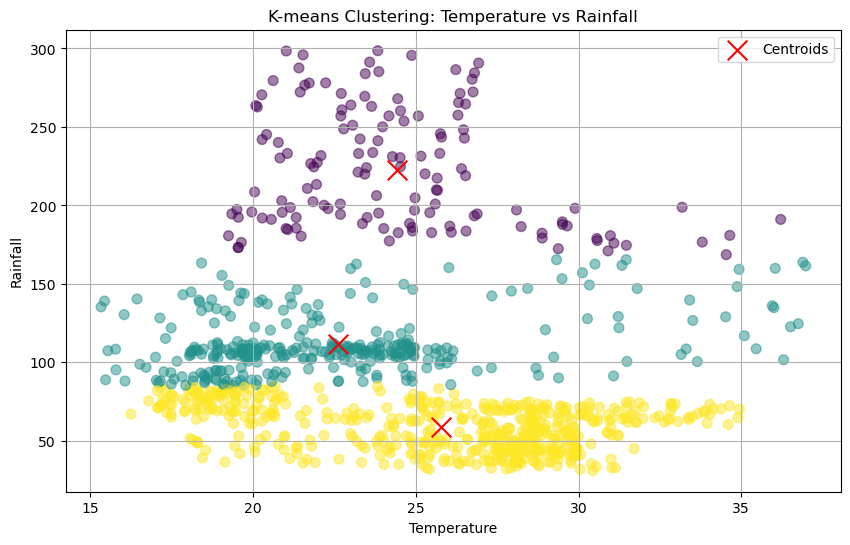

Inertia for 1 clusters: 589552.5008132714
Inertia for 2 clusters: 143434.6660876606
Inertia for 3 clusters: 43100.7765724457
Inertia for 4 clusters: 19284.321696058207
Inertia for 5 clusters: 14143.887506319657
Average accuracy for K-means clustering: 32.20%
Inertia change: [0.756705864380532, 0.17018652177169474, 0.04039751310279127, 0.008719213611421311, 0.0061063876879182116, 0.0030233193942830502, -0.0013218201963398784, 0.0003082468933994814, 0.008147616249665156]


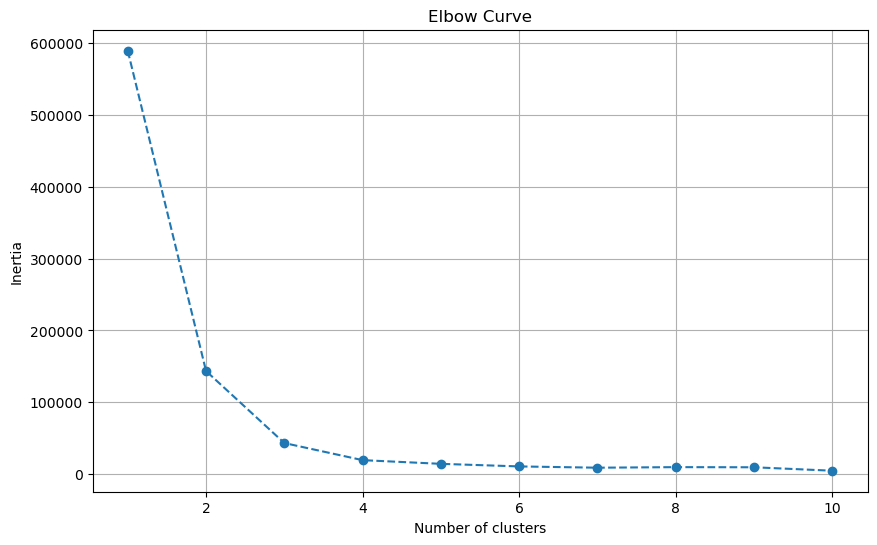

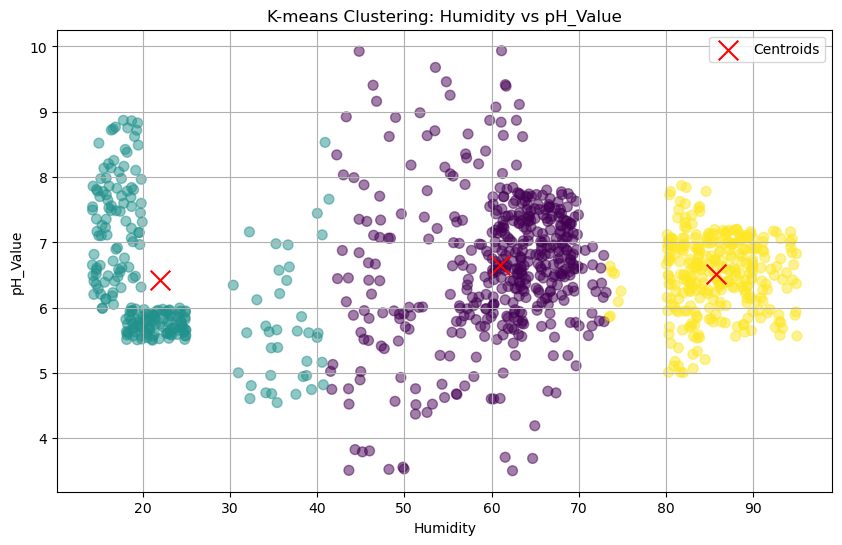

Inertia for 1 clusters: 4008527.5516610853
Inertia for 2 clusters: 1481752.5859407391
Inertia for 3 clusters: 936920.4496496418
Inertia for 4 clusters: 616405.6832698399
Inertia for 5 clusters: 406706.7303297819
Average accuracy for K-means clustering: 35.52%
Inertia change: [0.630349906082916, 0.13591827155218766, 0.07995822961151519, 0.05231321232983948, 0.01625552085170825, 0.009913962055777726, 0.0009811508741595328, -0.05108381259850252, 0.0542519173379709]


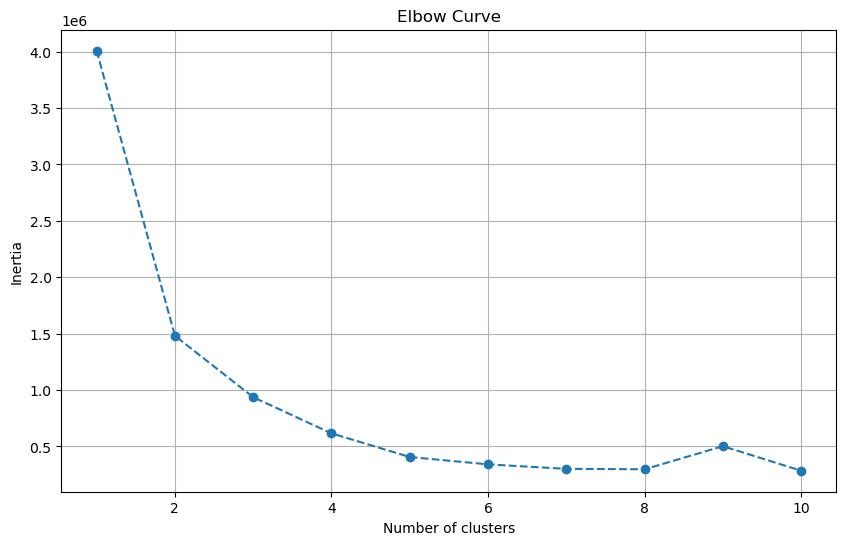

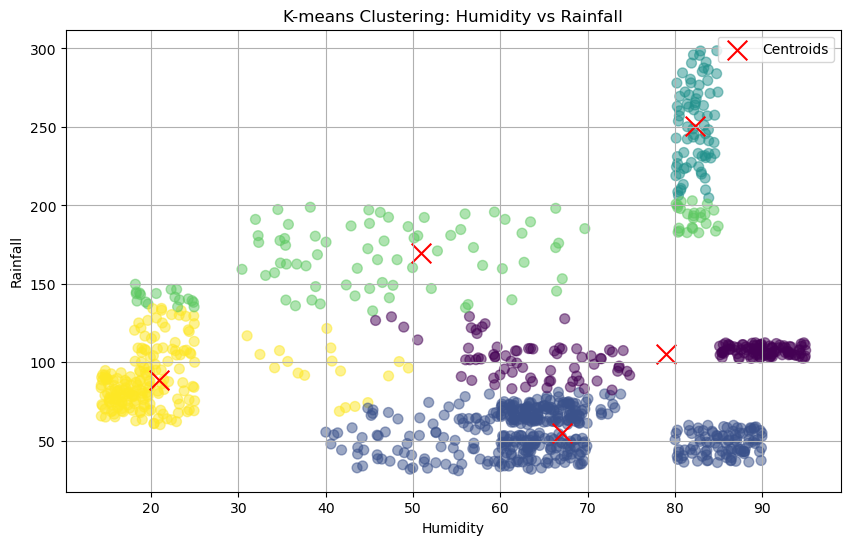

Inertia for 1 clusters: 3420740.7615378564
Inertia for 2 clusters: 910436.0275294548
Inertia for 3 clusters: 413888.67428213364
Inertia for 4 clusters: 313032.8926663632
Inertia for 5 clusters: 145254.3942911424
Average accuracy for K-means clustering: 34.91%
Inertia change: [0.7338482828730489, 0.14515784383031974, 0.029483608565072573, 0.049047416940122913, 0.007638523124725341, 0.01228300025352421, 0.0026009619076583935, 0.006877327454260217, -0.004921579990125129]


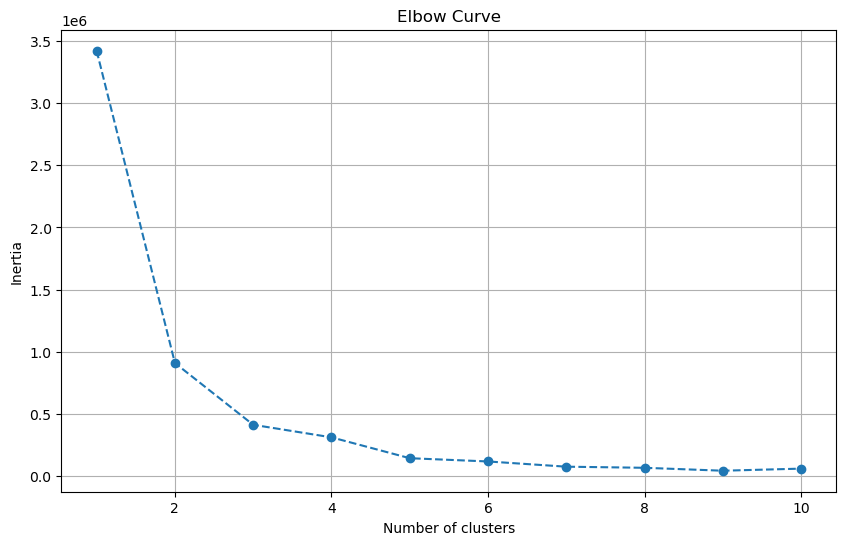

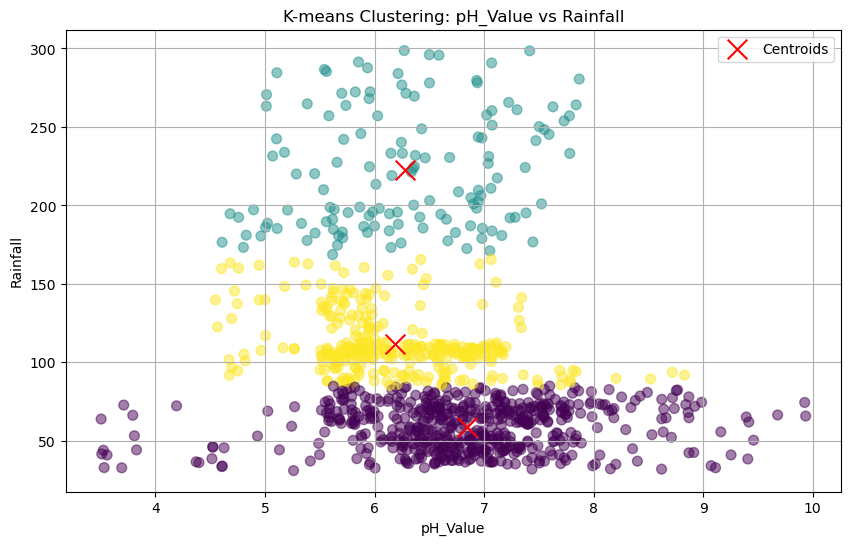

In [2]:
#Calculates by change amount AMAZING ////////////////////////////////////////////////////////////////////////////////////

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def assign_clusters(X, centroids):
    clusters = np.zeros(len(X))
    for i in range(len(X)):
        distances = [calculate_distance(X[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def update_centroids(X, clusters, n_clusters):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for i in range(n_clusters):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def kmeans(X, n_clusters, max_iterations=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iterations):
        # Assign clusters
        clusters = assign_clusters(X, centroids)
        
        # Update centroids
        new_centroids = update_centroids(X, clusters, n_clusters)

        # Check convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids


# Load the dataset
data = pd.read_csv("Crop_Recommendation.csv")

data = data.head(1000)

attributes = ['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH_Value','Rainfall']


import numpy as np

# Loop through each pair of attributes
for i in range(len(attributes)):
    for j in range(i+1, len(attributes)):
        X = data[[attributes[i], attributes[j]]].values

        # Elbow method to find the optimal number of clusters
        inertia = []
        accuracies = []
        for n_clusters in range(1, 11):
            clusters, centroids = kmeans(X, n_clusters)
            inertia.append(np.sum((X - centroids[clusters.astype(int)]) ** 2))

            # Calculate accuracy as the percentage of data points correctly assigned to clusters
            correct_assignments = sum(clusters == clusters[:, np.newaxis])  # Counting correctly assigned points
            accuracy = correct_assignments / len(X) * 100  # Calculate accuracy
            accuracies.append(accuracy)

        for n_clusters in range(1, 6):
            print(f"Inertia for {n_clusters} clusters: {inertia[n_clusters - 1]}")
        
        # Calculate average accuracy
        avg_accuracy = np.mean(accuracies)
        print(f"Average accuracy for K-means clustering: {avg_accuracy:.2f}%")
        # Calculate rate of change of inertia
        max_inertia = max(inertia)
        inertia_change = [(inertia[i] - inertia[i+1]) / max_inertia for i in range(len(inertia)-1)]

        print(f"Inertia change: {inertia_change}")

        # Find the number of clusters where the inertia change is less than 20%
        num_clusters = np.argmax(np.array(inertia_change) < 0.05) + 1

        # Perform K-means clustering with the selected number of clusters
        clusters, centroids = kmeans(X, num_clusters)

        # Plot the elbow curve
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.title('Elbow Curve')
        plt.grid(True)
        plt.show()

        # Plot the clusters
        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
        plt.title('K-means Clustering: {} vs {}'.format(attributes[i], attributes[j]))
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
        plt.legend()
        plt.grid(True)
        plt.show()
